---
# Main Program
---

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as mpe
%matplotlib inline

import seaborn as sns
import numpy as np

from IPython.display import display,Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  

#import investpy

from binance.client import Client
client = Client()

#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

#------------ My Functions ------------#
from Functions.Visualization import Plots
from Functions.Preparation_Data import Preprocessing
from Functions.Extract_Data.Binance_API.Extract_Binance_Data import Binance
from Functions.Feature_Engineering.FE import Feature_Engineering
#------------ My Functions ------------#

In [2]:
from matplotlib.animation import FuncAnimation
import matplotlib.patheffects as mpe
import mplcyberpunk as mplcp

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:/Users/voudo/OneDrive/Υπολογιστής/PROGRAMS/Forecast_Prices/Data/Cryptocurrency/Crypto_Data.csv', index_col='Open time')
df

BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  BTCBUSD_Close  \
Open time                                                            
2020-01-01       7169.12       7231.86      7151.58        7176.58   
2020-01-02       7177.13       7185.03      6900.00        6945.33   
2020-01-03       6944.41       7393.50      6853.79        7329.20   
2020-01-04       7330.91       7388.00      7263.55        7346.20   
2020-01-05       7346.20       7486.66      7315.00        7351.42   
...                  ...           ...          ...            ...   
2023-01-01      16534.83      16619.00     16490.74       16610.68   
2023-01-02      16610.69      16793.83     16541.73       16667.55   
2023-01-03      16667.39      16774.13     16597.71       16669.47   
2023-01-04      16669.36      16986.86     16646.27       16845.70   
2023-01-05      16845.42      16872.96     16745.00       16861.60   

            BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  ETHBUSD_Low  \
Open time                                                              
2020-01-01     5.984141e+05        128.54        132.51       128.43   
2020-01-02     1.795818e+06        129.88        129.88       126.01   
2020-01-03     3.498114e+06        127.02        134.63       125.70   
2020-01-04     2.473634e+06        134.20        135.52       132.38   
2020-01-05     2.647992e+06        134.26        137.99       134.26   
...                     ...           ...           ...          ...   
2023-01-01     2.362445e+08       1195.67       1204.00      1190.22   
2023-01-02     3.497910e+08       1199.99       1224.00      1192.73   
2023-01-03     5.884571e+08       1213.61       1219.58      1204.32   
2023-01-04     5.620057e+08       1214.15       1272.35      1212.35   
2023-01-05     3.569742e+08       1256.34       1259.56      1242.40   

            ETHBUSD_Close  BNBUSDT_Open  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                                ...                               
2020-01-01         130.35       13.7159  ...       202.63         203.65   
2020-01-02         126.87       13.7072  ...       192.41         195.44   
2020-01-03         133.75       13.0104  ...       192.22         221.76   
2020-01-04         134.17       13.6481  ...       219.37         224.18   
2020-01-05         134.99       13.7978  ...       221.05         222.62   
...                   ...           ...  ...          ...            ...   
2023-01-01        1199.99      246.3000  ...        96.10          96.70   
2023-01-02        1213.61      244.5000  ...        95.40          99.30   
2023-01-03        1214.14      245.3000  ...        98.70          99.70   
2023-01-04        1256.34      246.2000  ...        99.50         101.50   
2023-01-05        1249.81      258.9000  ...       100.90         101.70   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-04       0.04529       0.04572      0.04510        0.04550   
2020-01-05       0.04549       0.04605      0.04525        0.04525   
...                  ...           ...          ...            ...   
2023-01-01       0.07100       0.07270      0.07060        0.07250   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   
2023-01-05       0.07380       0.07430      0.07240        0.07330   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604          1.620         1.591           1.593  
2020-01-02          1.594          1.597     

In [4]:
df = Feature_Engineering.Log_Return(dataframe=df, name_of_column='BTCBUSD_Open')
df

BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  BTCBUSD_Close  \
Open time                                                            
2020-01-01       7169.12       7231.86      7151.58        7176.58   
2020-01-02       7177.13       7185.03      6900.00        6945.33   
2020-01-03       6944.41       7393.50      6853.79        7329.20   
2020-01-04       7330.91       7388.00      7263.55        7346.20   
2020-01-05       7346.20       7486.66      7315.00        7351.42   
...                  ...           ...          ...            ...   
2023-01-01      16534.83      16619.00     16490.74       16610.68   
2023-01-02      16610.69      16793.83     16541.73       16667.55   
2023-01-03      16667.39      16774.13     16597.71       16669.47   
2023-01-04      16669.36      16986.86     16646.27       16845.70   
2023-01-05      16845.42      16872.96     16745.00       16861.60   

            BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  ETHBUSD_Low  \
Open time                                                              
2020-01-01     5.984141e+05        128.54        132.51       128.43   
2020-01-02     1.795818e+06        129.88        129.88       126.01   
2020-01-03     3.498114e+06        127.02        134.63       125.70   
2020-01-04     2.473634e+06        134.20        135.52       132.38   
2020-01-05     2.647992e+06        134.26        137.99       134.26   
...                     ...           ...           ...          ...   
2023-01-01     2.362445e+08       1195.67       1204.00      1190.22   
2023-01-02     3.497910e+08       1199.99       1224.00      1192.73   
2023-01-03     5.884571e+08       1213.61       1219.58      1204.32   
2023-01-04     5.620057e+08       1214.15       1272.35      1212.35   
2023-01-05     3.569742e+08       1256.34       1259.56      1242.40   

            ETHBUSD_Close  BNBUSDT_Open  ...  BCHBUSD_Close  XLMBUSD_Open  \
Open time                                ...                                
2020-01-01         130.35       13.7159  ...         203.65       0.04471   
2020-01-02         126.87       13.7072  ...         195.44       0.04516   
2020-01-03         133.75       13.0104  ...         221.76       0.04347   
2020-01-04         134.17       13.6481  ...         224.18       0.04529   
2020-01-05         134.99       13.7978  ...         222.62       0.04549   
...                   ...           ...  ...            ...           ...   
2023-01-01        1199.99      246.3000  ...          96.70       0.07100   
2023-01-02        1213.61      244.5000  ...          99.30       0.07250   
2023-01-03        1214.14      245.3000  ...          99.70       0.07370   
2023-01-04        1256.34      246.2000  ...         101.50       0.07360   
2023-01-05        1249.81      258.9000  ...         101.70       0.07380   

            XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  QTUMBUSD_Open  \
Open time                                                             
2020-01-01       0.04548      0.04471        0.04522          1.604   
2020-01-02       0.04516      0.04341        0.04343          1.594   
2020-01-03       0.04557      0.04317        0.04551          1.530   
2020-01-04       0.04572      0.04510        0.04550          1.620   
2020-01-05       0.04605      0.04525        0.04525          1.646   
...                  ...          ...            ...            ...   
2023-01-01       0.07270      0.07060        0.07250          1.833   
2023-01-02       0.07440      0.07090        0.07380          1.879   
2023-01-03       0.07440      0.07280        0.07350          1.906   
2023-01-04       0.07460      0.07270        0.07390          1.886   
2023-01-05       0.07430      0.07240        0.07330          1.946   

            QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  BTCBUSD_Open_LG  
Open time                                                                 
2020-01-01          1.620         1.591           1.593              NaN  
2020-01-02   

In [4]:
df = Preprocessing.Select_Target(dataframe=df, column_name='BTCBUSD_Open')

--- Start Select_Target()
.
Target:  BTCBUSD_Open 
.
--- End Select_Target()



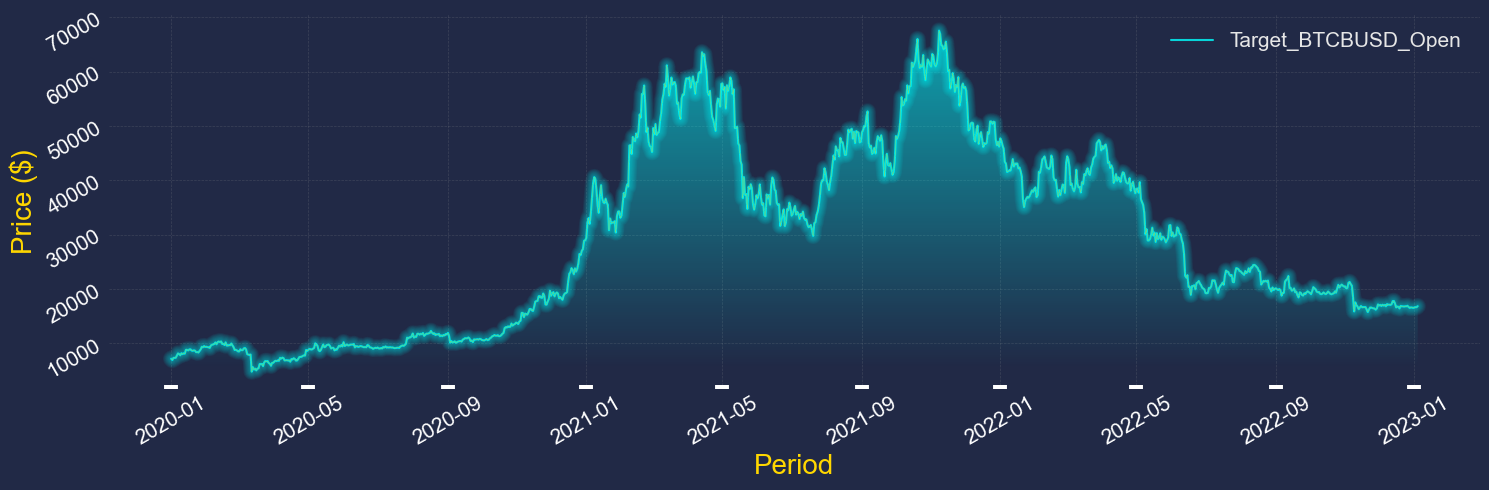

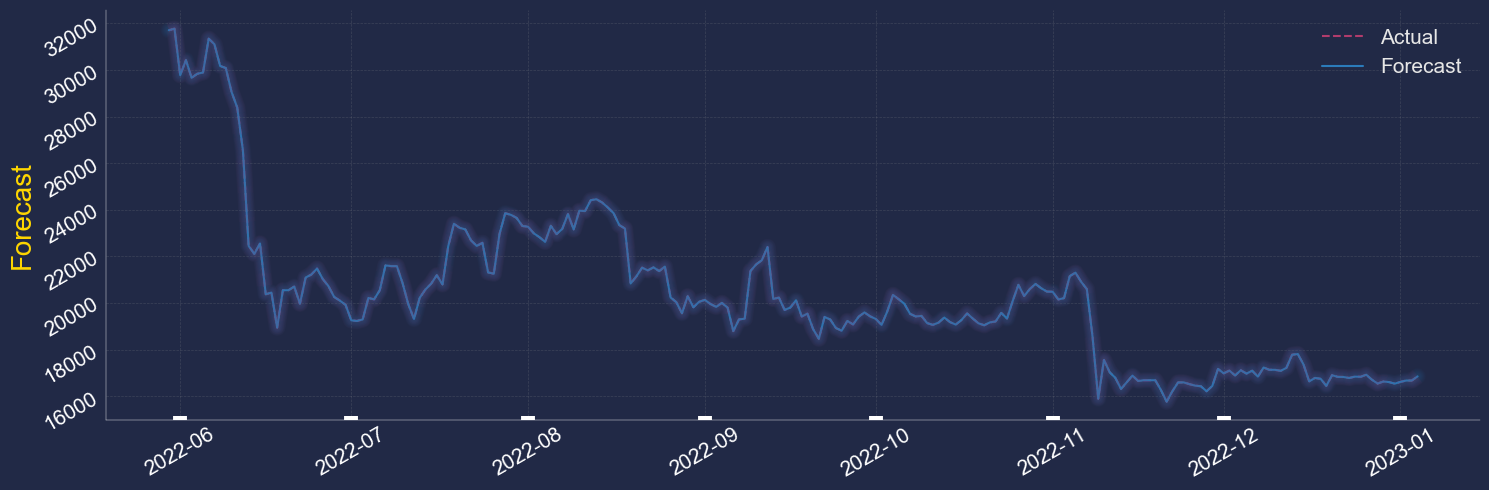

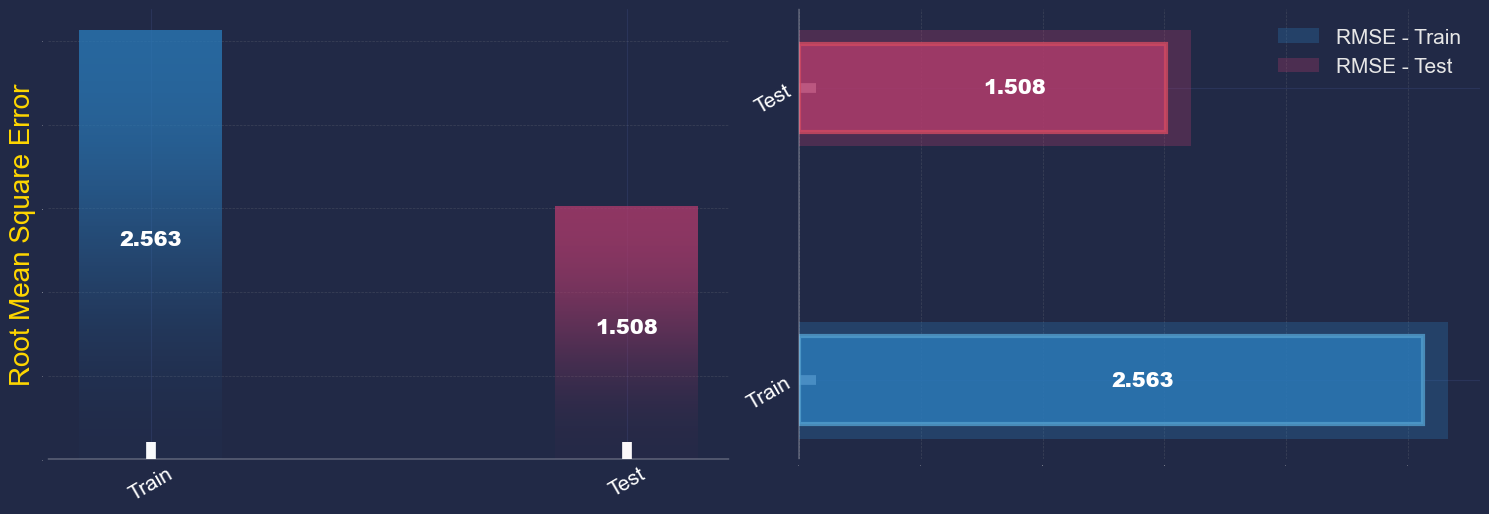

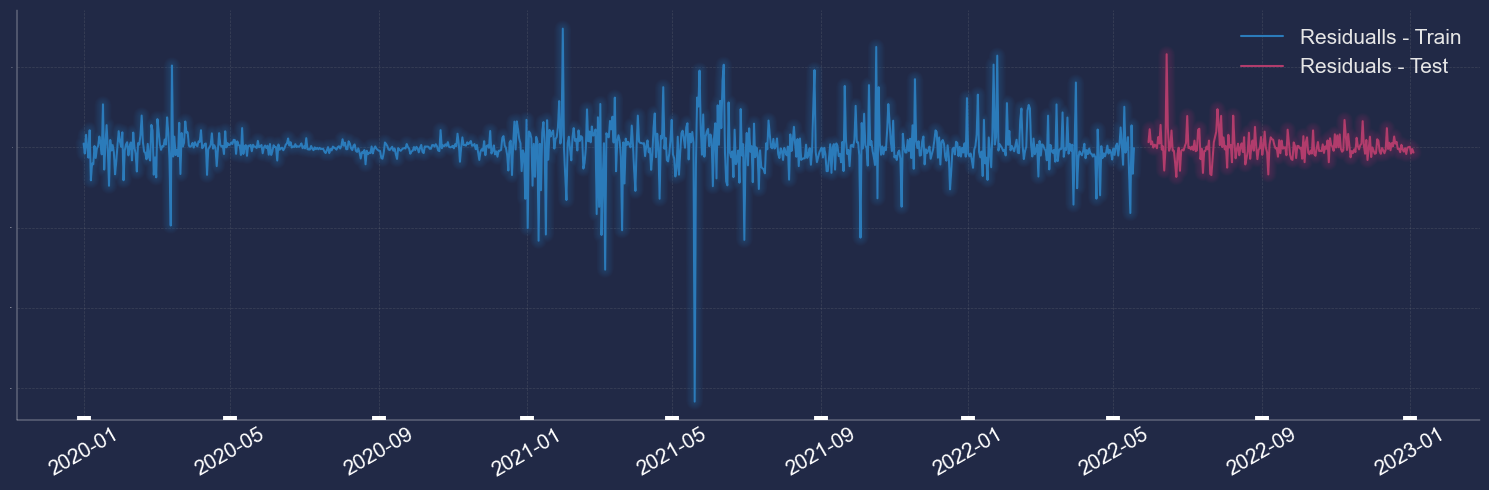

In [5]:
Plots.Plot_Of_Line(dataframe=df, column_name='Target_BTCBUSD_Open')
#Plots.Plot_Percentage(dataframe=df, column_name_1='BUSDUSDT_Volume', column_name_2='BTCBUSD_Open')
#Plots.Plot_Train_Test_Split(dataframe=df)
#Plots.Plot_Train_Test_Splits(dataframe=df)

lr = LinearRegression()
Plots.Recursive_Forecast_Plot_Split(dataframe=df, model=lr)

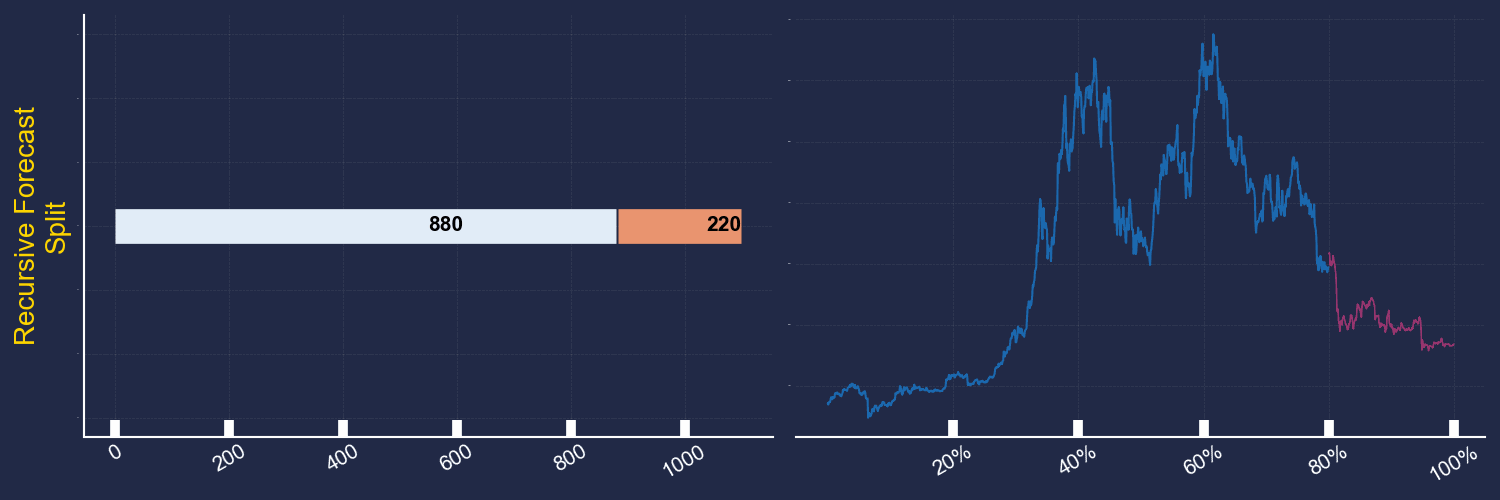

In [75]:
Image('../Forecast_Prices/Animation/plot_bar_line.gif')

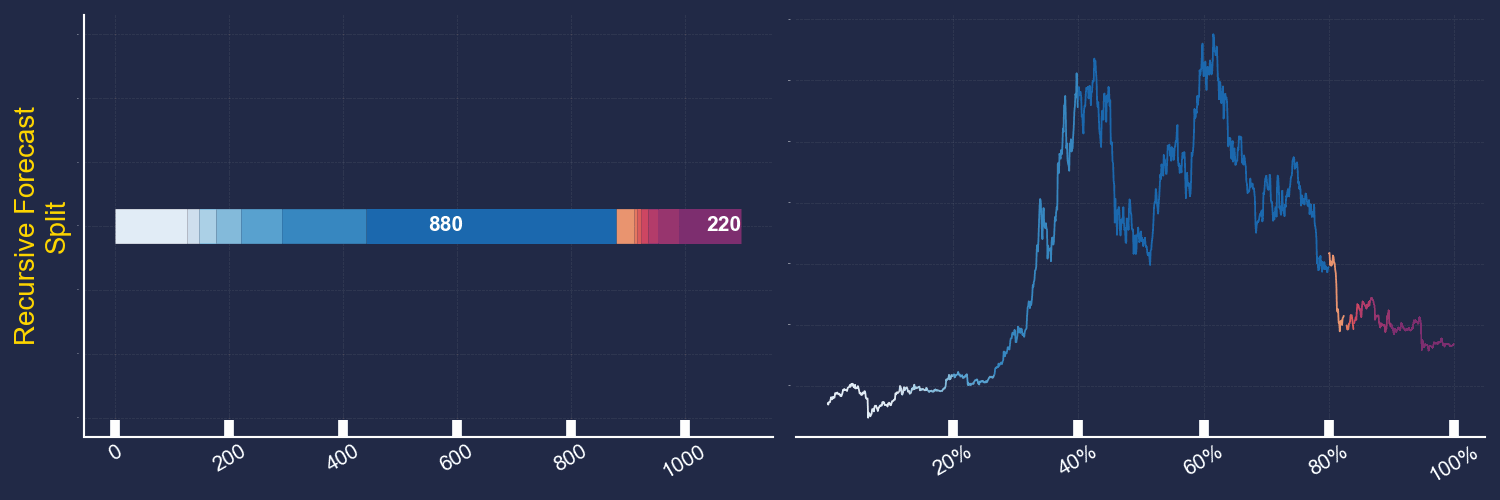

In [76]:
Image('../Forecast_Prices/Animation/plot_bars_lines.gif')

# Binance

In [18]:
df = pd.read_csv("../Forecast_Prices/Data/Binance_Data_Crypto/Binance_Crypto_Data.csv", index_col="Open time")
df

ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-04     0.018298     0.018360    0.018140      0.018248     0.005747   
2020-01-05     0.018247     0.018565    0.018152      0.018400     0.005817   
...                 ...          ...         ...           ...          ...   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   
2023-12-30     0.054650     0.054850    0.054130      0.054380     0.001742   
2023-12-31     0.054370     0.054470    0.053550      0.053970     0.001738   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-04     0.005828    0.005713      0.005818     0.001859     0.001887   
2020-01-05     0.005970    0.005740      0.005884     0.001876     0.001917   
...                 ...         ...           ...          ...          ...   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   
2023-12-30     0.001765    0.001720      0.001737     0.007459     0.007627   
2023-12-31     0.001745    0.001696      0.001723     0.007524     0.007706   

            ...  RENDERTRY_Low  RENDERTRY_Close  RENDEREUR_Open  \
Open time   ...                                                   
2020-01-01  ...            NaN              NaN             NaN   
2020-01-02  ...            NaN              NaN             NaN   
2020-01-03  ...            NaN              NaN             NaN   
2020-01-04  ...            NaN              NaN             NaN   
2020-01-05  ...            NaN              NaN             NaN   
...         ...            ...              ...             ...   
2023-12-27  ...            NaN              NaN             NaN   
2023-12-28  ...            NaN              NaN             NaN   
2023-12-29  ...            NaN              NaN             NaN   
2023-12-30  ...            NaN              NaN             NaN   
2023-12-31  ...            NaN              NaN             NaN   

            RENDEREUR_High  RENDEREUR_Low  RENDEREUR_Close  RENDERBRL_Open  \
Open time                                                                    
2020-01-01             NaN            NaN              NaN             NaN   
2020-01-02             NaN            NaN              NaN             NaN   
2020-01-03             NaN            NaN              NaN             NaN   
2020-01-04             NaN            NaN              NaN             NaN   
2020-01-05             NaN            NaN              NaN             NaN   
...                    ...            ...              ...             ...   
2023-12-27             NaN            NaN              NaN             NaN   
2023-12-28             NaN            NaN              NaN             NaN   
2023-12-29             NaN            NaN              NaN             NaN   
2023-12-30             NaN            NaN              NaN             NaN   
2023-12-31             NaN            NaN              NaN             NaN   

            RENDERBRL_High  RENDERBRL_Low  RENDERBRL_Close  
Open tim

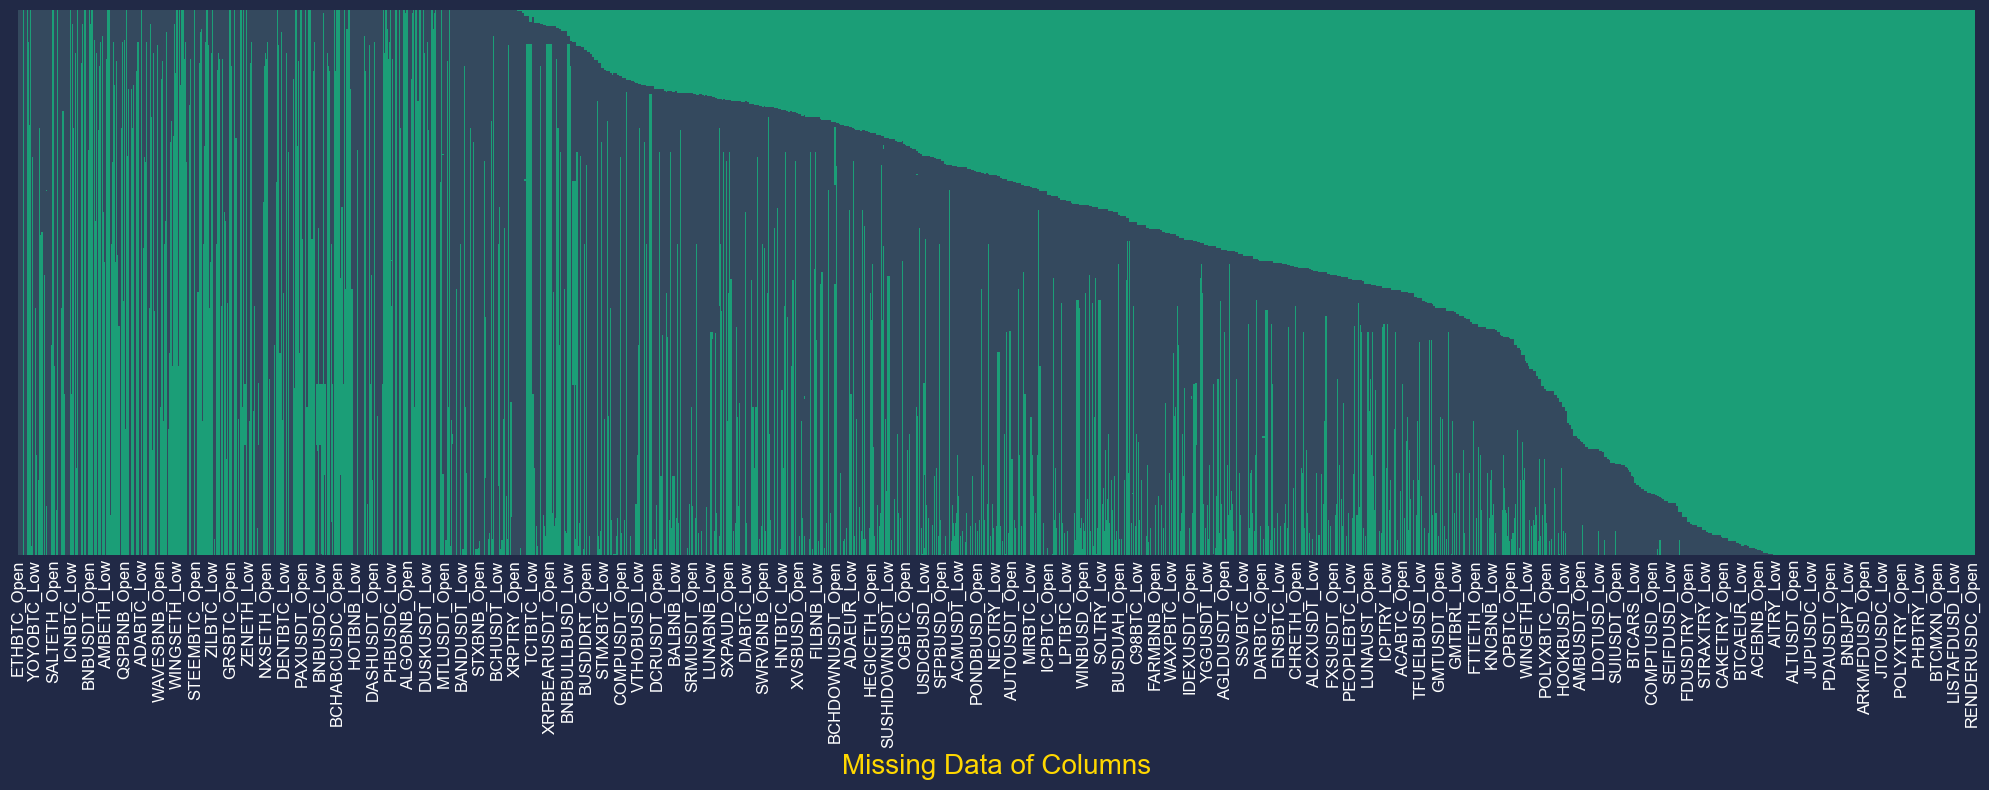

In [19]:
Plots.Plot_Of_Missing_Data(dataframe=df)

In [4]:
#Plots.Plot_Of_Missing_Data(dataframe=df[df.index >= '2020-08-01'])

In [20]:
df = Preprocessing.Drop_Big_NullSum_Columns(dataframe=df)

--- Start Drop_Big_NullSum_Columns()
.
 Drop 40% null columns 
.
--- End  Drop_Big_NullSum_Columns()



In [21]:
df['BTCBUSD_Open']

Open time
2020-01-01    7169.12
2020-01-02    7177.13
2020-01-03    6944.41
2020-01-04    7330.91
2020-01-05    7346.20
               ...   
2023-12-27        NaN
2023-12-28        NaN
2023-12-29        NaN
2023-12-30        NaN
2023-12-31        NaN
Name: BTCBUSD_Open, Length: 1461, dtype: float64

In [22]:
df['BTCBUSD_Close']

Open time
2020-01-01    7176.58
2020-01-02    6945.33
2020-01-03    7329.20
2020-01-04    7346.20
2020-01-05    7351.42
               ...   
2023-12-27        NaN
2023-12-28        NaN
2023-12-29        NaN
2023-12-30        NaN
2023-12-31        NaN
Name: BTCBUSD_Close, Length: 1461, dtype: float64

In [23]:
df['BTCBUSD_Low']

Open time
2020-01-01    7151.58
2020-01-02    6900.00
2020-01-03    6853.79
2020-01-04    7263.55
2020-01-05    7315.00
               ...   
2023-12-27        NaN
2023-12-28        NaN
2023-12-29        NaN
2023-12-30        NaN
2023-12-31        NaN
Name: BTCBUSD_Low, Length: 1461, dtype: float64

In [25]:
df['BTCBUSD_High']

Open time
2020-01-01    7231.86
2020-01-02    7185.03
2020-01-03    7393.50
2020-01-04    7388.00
2020-01-05    7486.66
               ...   
2023-12-27        NaN
2023-12-28        NaN
2023-12-29        NaN
2023-12-30        NaN
2023-12-31        NaN
Name: BTCBUSD_High, Length: 1461, dtype: float64

In [ ]:
def Drop_Missing_Data(dataframe):
    '''
    This Function Return a dataframe with drop null columns
    ------------------------------
    Parameter(dataframe): DataFrame
    ------------------------------
    '''
    
    print('--- Start Drop_Missing_Data()\n.\n.')

    for _ in dataframe.columns:
        if dataframe.isnull().sum()[_] > 7:
            #print(_, ': ', dataframe[dataframe.index < '2021-01-01'].isnull().sum()[_])
            dataframe.drop(columns=_, axis=1, inplace=True)
    
    print('--- End  Drop_Missing_Data()\n')
    return dataframe



In [7]:
df = Preprocessing.Drop_Holidays_Values(dataframe=df)

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()


In [9]:
df = Preprocessing.Drop_Missing_Data(dataframe=df)

--- Start Drop_Missing_Data()
.
.
--- End  Drop_Missing_Data()



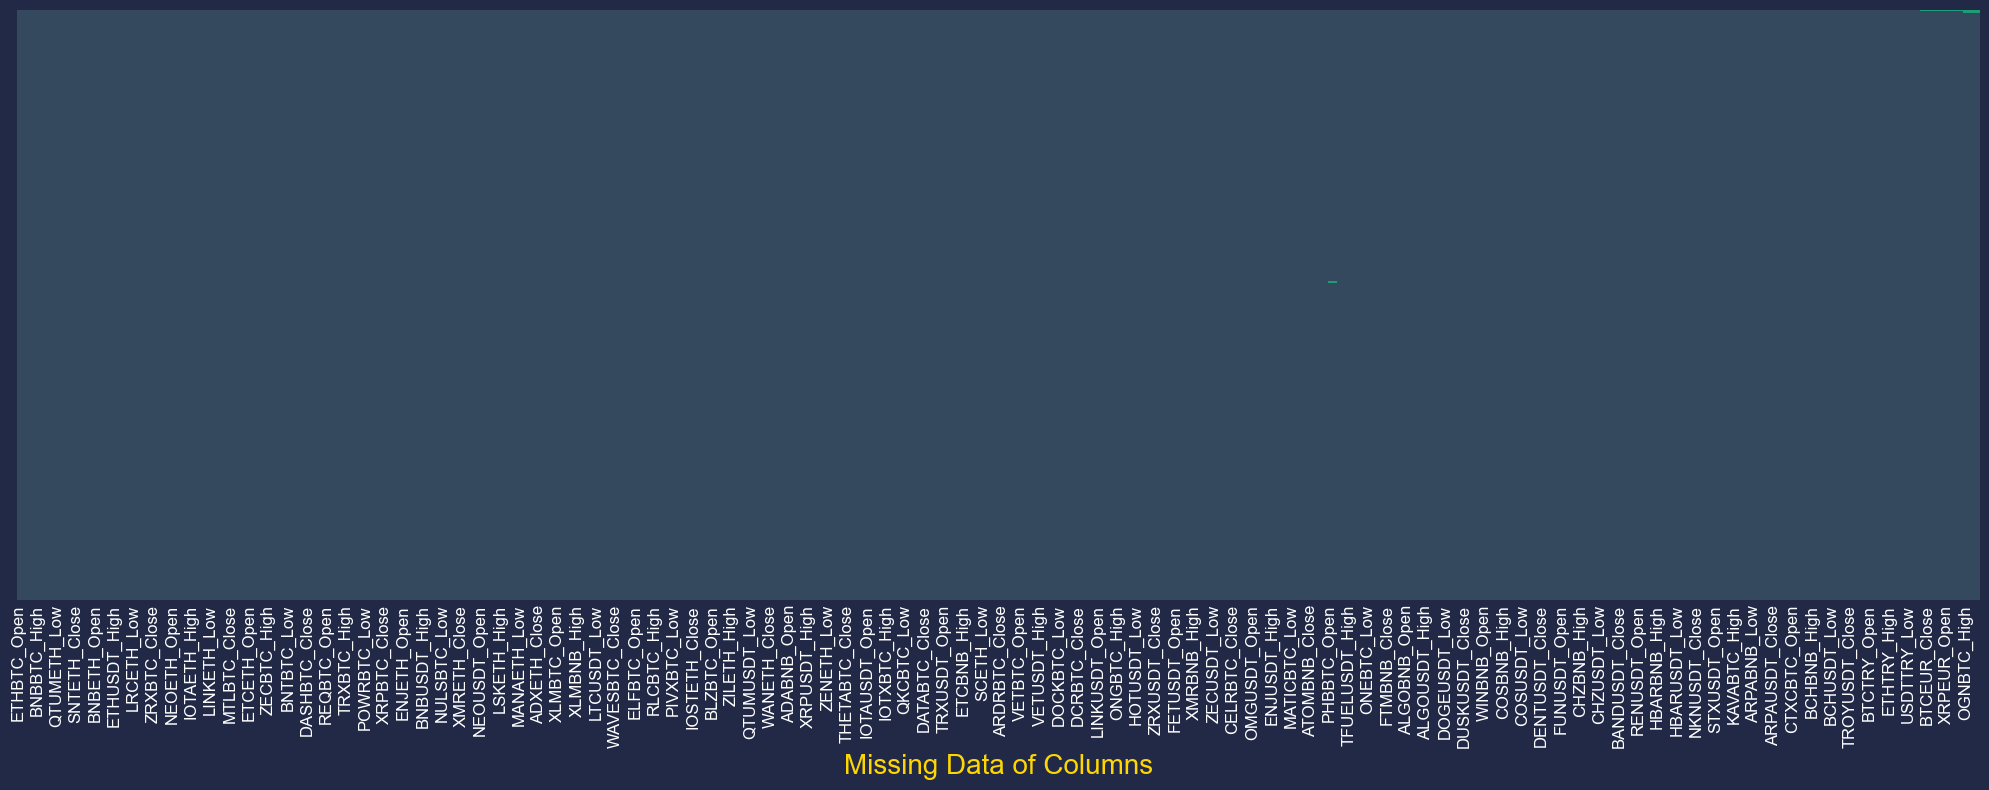

In [7]:
Plots.Plot_Of_Missing_Data(dataframe=df)

In [10]:
df = Preprocessing.Forward_Fill_Data(dataframe=df)
df = Preprocessing.Backrward_Fill_Data(dataframe=df)

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()



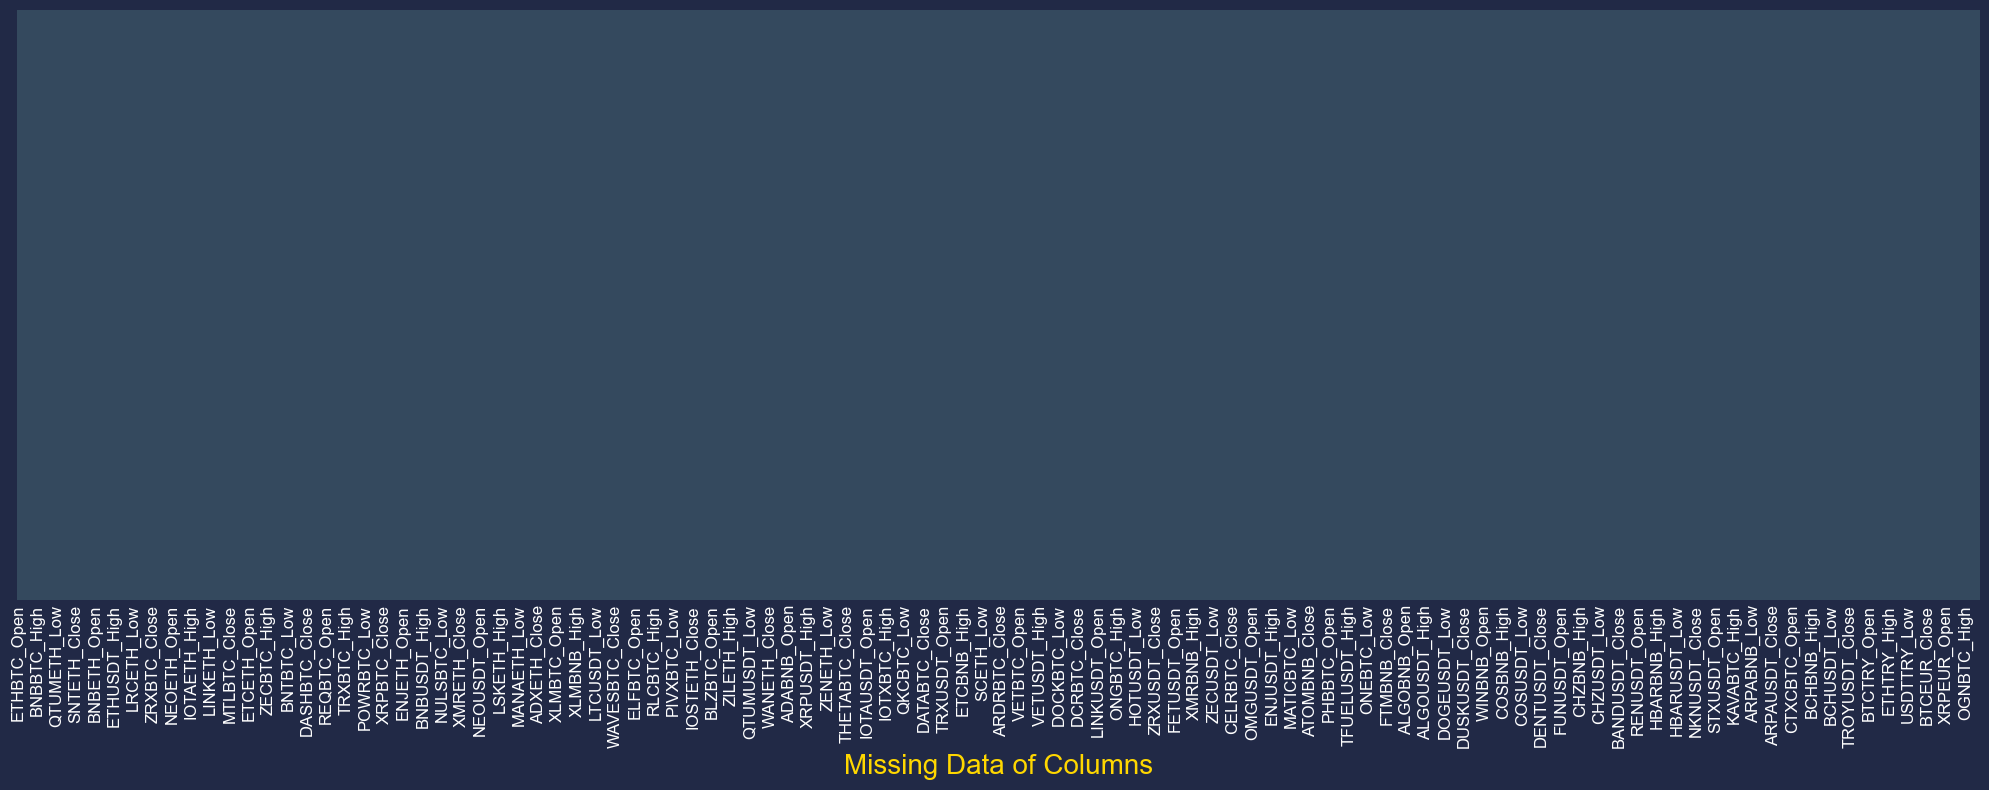

In [9]:
Plots.Plot_Of_Missing_Data(dataframe=df)

In [11]:
df1 = df

In [12]:
df1

ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-06     0.018400     0.018900    0.018337      0.018576     0.005884   
2020-01-07     0.018577     0.018586    0.017515      0.017528     0.005905   
...                 ...          ...         ...           ...          ...   
2023-12-25     0.052660     0.052920    0.052080      0.052110     0.001654   
2023-12-26     0.052120     0.052690    0.052080      0.052480     0.001658   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-06     0.006000    0.005852      0.005905     0.001909     0.001959   
2020-01-07     0.005905    0.005672      0.005684     0.001927     0.001928   
...                 ...         ...           ...          ...          ...   
2023-12-25     0.001680    0.001648      0.001657     0.006154     0.006169   
2023-12-26     0.001754    0.001655      0.001722     0.006123     0.007111   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   

            ...  EURUSDT_Low  EURUSDT_Close  OGNBTC_Open  OGNBTC_High  \
Open time   ...                                                         
2020-01-01  ...       1.1126         1.1157     0.000012     0.000200   
2020-01-02  ...       1.1126         1.1157     0.000012     0.000200   
2020-01-03  ...       1.1126         1.1157     0.000012     0.000200   
2020-01-06  ...       1.1155         1.1179     0.000012     0.000200   
2020-01-07  ...       1.1131         1.1174     0.000012     0.000200   
...         ...          ...            ...          ...          ...   
2023-12-25  ...       1.0880         1.0974     0.000004     0.000004   
2023-12-26  ...       1.0969         1.1023     0.000004     0.000004   
2023-12-27  ...       1.1014         1.1094     0.000004     0.000004   
2023-12-28  ...       1.1030         1.1041     0.000004     0.000004   
2023-12-29  ...       1.1000         1.1003     0.000003     0.000003   

            OGNBTC_Low  OGNBTC_Close  OGNUSDT_Open  OGNUSDT_High  OGNUSDT_Low  \
Open time                                                                       
2020-01-01    0.000012      0.000028        0.0989        0.4990       0.0989   
2020-01-02    0.000012      0.000028        0.0989        0.4990       0.0989   
2020-01-03    0.000012      0.000028        0.0989        0.4990       0.0989   
2020-01-06    0.000012      0.000028        0.0989        0.4990       0.0989   
2020-01-07    0.000012      0.000028        0.0989        0.4990       0.0989   
...                ...           ...           ...           ...          ...   
2023-12-25    0.000004      0.000004        0.1524        0.1661       0.1515   
2023-12-26    0.000003      0.000004        0.1628        0.1634       0.1371   
2023-12-27    0.000003      0.000004        0.1513        0.1624       0.1462   
2023-12-28    0.000003      0.000003        0.1575        0.1605       0.1450   
2023-12-29    0.000003      0.0000

In [13]:
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='ETHBTC_Open')
df1

--- Start Select_Target()
.
Target:  ETHBTC_Open 
.
--- End Select_Target()



Target_ETHBTC_Open  ETHBTC_Open  ETHBTC_High  ETHBTC_Low  \
Open time                                                              
2020-01-01            0.018152     0.017954     0.018356    0.017920   
2020-01-02            0.018257     0.018152     0.018319    0.017965   
2020-01-03            0.018400     0.018257     0.018425    0.017800   
2020-01-06            0.018577     0.018400     0.018900    0.018337   
2020-01-07            0.017528     0.018577     0.018586    0.017515   
...                        ...          ...          ...         ...   
2023-12-22            0.052660     0.051050     0.053660    0.050810   
2023-12-25            0.052120     0.052660     0.052920    0.052080   
2023-12-26            0.052470     0.052120     0.052690    0.052080   
2023-12-27            0.054770     0.052470     0.055110    0.052350   
2023-12-28            0.055080     0.054770     0.056220    0.054760   

            ETHBTC_Close  LTCBTC_Open  LTCBTC_High  LTCBTC_Low  LTCBTC_Close  \
Open time                                                                      
2020-01-01      0.018150     0.005739     0.005812    0.005729      0.005779   
2020-01-02      0.018256     0.005777     0.005806    0.005626      0.005660   
2020-01-03      0.018297     0.005660     0.005754    0.005585      0.005750   
2020-01-06      0.018576     0.005884     0.006000    0.005852      0.005905   
2020-01-07      0.017528     0.005905     0.005905    0.005672      0.005684   
...                  ...          ...          ...         ...           ...   
2023-12-22      0.052870     0.001616     0.001685    0.001604      0.001674   
2023-12-25      0.052110     0.001654     0.001680    0.001648      0.001657   
2023-12-26      0.052480     0.001658     0.001754    0.001655      0.001722   
2023-12-27      0.054770     0.001723     0.001802    0.001711      0.001748   
2023-12-28      0.055070     0.001750     0.001809    0.001732      0.001797   

            BNBBTC_Open  ...  EURUSDT_Low  EURUSDT_Close  OGNBTC_Open  \
Open time                ...                                            
2020-01-01     0.001907  ...       1.1126         1.1157     0.000012   
2020-01-02     0.001905  ...       1.1126         1.1157     0.000012   
2020-01-03     0.001867  ...       1.1126         1.1157     0.000012   
2020-01-06     0.001909  ...       1.1155         1.1179     0.000012   
2020-01-07     0.001927  ...       1.1131         1.1174     0.000012   
...                 ...  ...          ...            ...          ...   
2023-12-22     0.006204  ...       1.0981         1.0981     0.000003   
2023-12-25     0.006154  ...       1.0880         1.0974     0.000004   
2023-12-26     0.006123  ...       1.0969         1.1023     0.000004   
2023-12-27     0.007002  ...       1.1014         1.1094     0.000004   
2023-12-28     0.007463  ...       1.1030         1.1041     0.000004   

            OGNBTC_High  OGNBTC_Low  OGNBTC_Close  OGNUSDT_Open  OGNUSDT_High  \
Open time                                                                       
2020-01-01     0.000200    0.000012      0.000028        0.0989        0.4990   
2020-01-02     0.000200    0.000012      0.000028        0.0989        0.4990   
2020-01-03     0.000200    0.000012      0.000028        0.0989        0.4990   
2020-01-06     0.000200    0.000012      0.000028        0.0989        0.4990   
2020-01-07     0.000200    0.000012      0.000028        0.0989        0.4990   
...                 ...         ...           ...           ...           ...   
2023-12-22     0.000003    0.000003      0.000003        0.1452        0.1493   
2023-12-25     0.000004    0.000004      0.000004        0.1524        0.1661   
2023-12-26     0.000004    0.000003      0.000004        0.1628        0.1634   
2023-12-27     0.000004    0.000003      0.000004        0.1513        0.1624   
2023-12-28     0.000004    0.000003      0.000003        0.1575        0.1605   

            OGNUSDT_Low  OGNUS

In [14]:
lr = LinearRegression()

In [ ]:
def log_return(self, name_of_column):
    '''
    This function create a columns and calculate Log Returns
    Parameter is column_log_return = list ... ['BTCBUSD_Open', 'ETHBUSD_Open']
    '''
    for _ in range(len(column_log_return)):
        self.data[column_log_return+'_LG'] = np.log(self.data[column_log_return] / self.data[column_log_return].shift(1))
        
    return 

In [85]:
for _ in df['ETHBTC_Open']:
    print(_)

0.017954
0.018152
0.018257
0.0184
0.018577
0.017528
0.017472
0.01762
0.017904
0.017704
0.018799
0.018864
0.018827
0.019171
0.019307
0.019397
0.019359
0.019371
0.019489
0.019088
0.018732
0.018677
0.019412
0.020189
0.020418
0.020542
0.0212
0.021816
0.022513
0.022626
0.023154
0.025732
0.026231
0.02611
0.0276
0.0278
0.026937
0.026781
0.027628
0.027509
0.026475
0.025487
0.025813
0.02552
0.02603
0.025556
0.025627
0.025221
0.024818
0.025572
0.025424
0.024526
0.022411
0.023084
0.022076
0.021771
0.021893
0.02212
0.021029
0.021016
0.020526
0.020377
0.020548
0.021158
0.020659
0.020706
0.020422
0.020797
0.021068
0.023377
0.022872
0.02352
0.02328
0.022977
0.022856
0.023069
0.023067
0.024267
0.025276
0.024928
0.024956
0.025647
0.024798
0.025664
0.025252
0.02536
0.024536
0.023898
0.023594
0.023279
0.022757
0.021758
0.021232
0.021504
0.021695
0.021536
0.021441
0.020763
0.021387
0.022082
0.021948
0.022076
0.021917
0.022924
0.022937
0.022726
0.022634
0.023
0.024507
0.024338
0.024975
0.025305
0.024842
0.

In [86]:
df['ETHBTC_Open_LG'] = np.log(df['ETHBTC_Open'] / df['ETHBTC_Open'].shift(1))
df

ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-06     0.018400     0.018900    0.018337      0.018576     0.005884   
2020-01-07     0.018577     0.018586    0.017515      0.017528     0.005905   
...                 ...          ...         ...           ...          ...   
2023-12-25     0.052660     0.052920    0.052080      0.052110     0.001654   
2023-12-26     0.052120     0.052690    0.052080      0.052480     0.001658   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-06     0.006000    0.005852      0.005905     0.001909     0.001959   
2020-01-07     0.005905    0.005672      0.005684     0.001927     0.001928   
...                 ...         ...           ...          ...          ...   
2023-12-25     0.001680    0.001648      0.001657     0.006154     0.006169   
2023-12-26     0.001754    0.001655      0.001722     0.006123     0.007111   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   

            ...  EURUSDT_Close  OGNBTC_Open  OGNBTC_High  OGNBTC_Low  \
Open time   ...                                                        
2020-01-01  ...         1.1157     0.000012     0.000200    0.000012   
2020-01-02  ...         1.1157     0.000012     0.000200    0.000012   
2020-01-03  ...         1.1157     0.000012     0.000200    0.000012   
2020-01-06  ...         1.1179     0.000012     0.000200    0.000012   
2020-01-07  ...         1.1174     0.000012     0.000200    0.000012   
...         ...            ...          ...          ...         ...   
2023-12-25  ...         1.0974     0.000004     0.000004    0.000004   
2023-12-26  ...         1.1023     0.000004     0.000004    0.000003   
2023-12-27  ...         1.1094     0.000004     0.000004    0.000003   
2023-12-28  ...         1.1041     0.000004     0.000004    0.000003   
2023-12-29  ...         1.1003     0.000003     0.000003    0.000003   

            OGNBTC_Close  OGNUSDT_Open  OGNUSDT_High  OGNUSDT_Low  \
Open time                                                           
2020-01-01      0.000028        0.0989        0.4990       0.0989   
2020-01-02      0.000028        0.0989        0.4990       0.0989   
2020-01-03      0.000028        0.0989        0.4990       0.0989   
2020-01-06      0.000028        0.0989        0.4990       0.0989   
2020-01-07      0.000028        0.0989        0.4990       0.0989   
...                  ...           ...           ...          ...   
2023-12-25      0.000004        0.1524        0.1661       0.1515   
2023-12-26      0.000004        0.1628        0.1634       0.1371   
2023-12-27      0.000004        0.1513        0.1624       0.1462   
2023-12-28      0.000003        0.1575        0.1605       0.1450   
2023-12-29      0.000003        0.1462        0.1502       0.1408   

            OGNUSDT_Close  ETHBTC_Open_LG  
Open time                                  
2020-01-01         0.2180        

In [ ]:
df['ETHBTC_Open_LG'] = np.log(self.data[column_log_return] / self.data[column_log_return].shift(1))


In [4]:
df

BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  BTCBUSD_Close  \
Open time                                                            
2020-01-01       7169.12       7231.86      7151.58        7176.58   
2020-01-02       7177.13       7185.03      6900.00        6945.33   
2020-01-03       6944.41       7393.50      6853.79        7329.20   
2020-01-04       7330.91       7388.00      7263.55        7346.20   
2020-01-05       7346.20       7486.66      7315.00        7351.42   
...                  ...           ...          ...            ...   
2023-01-01      16534.83      16619.00     16490.74       16610.68   
2023-01-02      16610.69      16793.83     16541.73       16667.55   
2023-01-03      16667.39      16774.13     16597.71       16669.47   
2023-01-04      16669.36      16986.86     16646.27       16845.70   
2023-01-05      16845.42      16872.96     16745.00       16861.60   

            BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  ETHBUSD_Low  \
Open time                                                              
2020-01-01     5.984141e+05        128.54        132.51       128.43   
2020-01-02     1.795818e+06        129.88        129.88       126.01   
2020-01-03     3.498114e+06        127.02        134.63       125.70   
2020-01-04     2.473634e+06        134.20        135.52       132.38   
2020-01-05     2.647992e+06        134.26        137.99       134.26   
...                     ...           ...           ...          ...   
2023-01-01     2.362445e+08       1195.67       1204.00      1190.22   
2023-01-02     3.497910e+08       1199.99       1224.00      1192.73   
2023-01-03     5.884571e+08       1213.61       1219.58      1204.32   
2023-01-04     5.620057e+08       1214.15       1272.35      1212.35   
2023-01-05     3.569742e+08       1256.34       1259.56      1242.40   

            ETHBUSD_Close  BNBUSDT_Open  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                                ...                               
2020-01-01         130.35       13.7159  ...       202.63         203.65   
2020-01-02         126.87       13.7072  ...       192.41         195.44   
2020-01-03         133.75       13.0104  ...       192.22         221.76   
2020-01-04         134.17       13.6481  ...       219.37         224.18   
2020-01-05         134.99       13.7978  ...       221.05         222.62   
...                   ...           ...  ...          ...            ...   
2023-01-01        1199.99      246.3000  ...        96.10          96.70   
2023-01-02        1213.61      244.5000  ...        95.40          99.30   
2023-01-03        1214.14      245.3000  ...        98.70          99.70   
2023-01-04        1256.34      246.2000  ...        99.50         101.50   
2023-01-05        1249.81      258.9000  ...       100.90         101.70   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-04       0.04529       0.04572      0.04510        0.04550   
2020-01-05       0.04549       0.04605      0.04525        0.04525   
...                  ...           ...          ...            ...   
2023-01-01       0.07100       0.07270      0.07060        0.07250   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   
2023-01-05       0.07380       0.07430      0.07240        0.07330   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604          1.620         1.591           1.593  
2020-01-02          1.594          1.597     

In [34]:
df

BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  BTCBUSD_Close  \
Open time                                                            
2020-01-01       7169.12       7231.86      7151.58        7176.58   
2020-01-02       7177.13       7185.03      6900.00        6945.33   
2020-01-03       6944.41       7393.50      6853.79        7329.20   
2020-01-04       7330.91       7388.00      7263.55        7346.20   
2020-01-05       7346.20       7486.66      7315.00        7351.42   
...                  ...           ...          ...            ...   
2023-01-01      16534.83      16619.00     16490.74       16610.68   
2023-01-02      16610.69      16793.83     16541.73       16667.55   
2023-01-03      16667.39      16774.13     16597.71       16669.47   
2023-01-04      16669.36      16986.86     16646.27       16845.70   
2023-01-05      16845.42      16872.96     16745.00       16861.60   

            BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  ETHBUSD_Low  \
Open time                                                              
2020-01-01     5.984141e+05        128.54        132.51       128.43   
2020-01-02     1.795818e+06        129.88        129.88       126.01   
2020-01-03     3.498114e+06        127.02        134.63       125.70   
2020-01-04     2.473634e+06        134.20        135.52       132.38   
2020-01-05     2.647992e+06        134.26        137.99       134.26   
...                     ...           ...           ...          ...   
2023-01-01     2.362445e+08       1195.67       1204.00      1190.22   
2023-01-02     3.497910e+08       1199.99       1224.00      1192.73   
2023-01-03     5.884571e+08       1213.61       1219.58      1204.32   
2023-01-04     5.620057e+08       1214.15       1272.35      1212.35   
2023-01-05     3.569742e+08       1256.34       1259.56      1242.40   

            ETHBUSD_Close  BNBUSDT_Open  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                                ...                               
2020-01-01         130.35       13.7159  ...       202.63         203.65   
2020-01-02         126.87       13.7072  ...       192.41         195.44   
2020-01-03         133.75       13.0104  ...       192.22         221.76   
2020-01-04         134.17       13.6481  ...       219.37         224.18   
2020-01-05         134.99       13.7978  ...       221.05         222.62   
...                   ...           ...  ...          ...            ...   
2023-01-01        1199.99      246.3000  ...        96.10          96.70   
2023-01-02        1213.61      244.5000  ...        95.40          99.30   
2023-01-03        1214.14      245.3000  ...        98.70          99.70   
2023-01-04        1256.34      246.2000  ...        99.50         101.50   
2023-01-05        1249.81      258.9000  ...       100.90         101.70   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-04       0.04529       0.04572      0.04510        0.04550   
2020-01-05       0.04549       0.04605      0.04525        0.04525   
...                  ...           ...          ...            ...   
2023-01-01       0.07100       0.07270      0.07060        0.07250   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   
2023-01-05       0.07380       0.07430      0.07240        0.07330   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604          1.620         1.591           1.593  
2020-01-02          1.594          1.597     

In [35]:
df1 = Preprocessing.Drop_Holidays_Values(dataframe=df)
df1 = Preprocessing.Select_Target(dataframe=df, column_name='ETHBUSD_Open')
df1

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()
--- Start Select_Target()
.
Target:  ETHBUSD_Open 
.
--- End Select_Target()



Target_ETHBUSD_Open  BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  \
Open time                                                                  
2020-01-01               129.88       7169.12       7231.86      7151.58   
2020-01-02               127.02       7177.13       7185.03      6900.00   
2020-01-03               135.02       6944.41       7393.50      6853.79   
2020-01-06               144.35       7349.84       7794.98      7343.29   
2020-01-07               142.90       7757.48       8204.71      7730.00   
...                         ...           ...           ...          ...   
2022-12-29              1200.01      16538.18      16660.00     16482.02   
2022-12-30              1199.99      16626.68      16672.74     16324.53   
2023-01-02              1213.61      16610.69      16793.83     16541.73   
2023-01-03              1214.15      16667.39      16774.13     16597.71   
2023-01-04              1256.34      16669.36      16986.86     16646.27   

            BTCBUSD_Close  BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  \
Open time                                                                
2020-01-01        7176.58     5.984141e+05        128.54        132.51   
2020-01-02        6945.33     1.795818e+06        129.88        129.88   
2020-01-03        7329.20     3.498114e+06        127.02        134.63   
2020-01-06        7755.10     4.159305e+06        135.02        144.23   
2020-01-07        8154.74     7.711175e+06        144.35        145.08   
...                   ...              ...           ...           ...   
2022-12-29       16627.09     7.016834e+08       1189.50       1205.78   
2022-12-30       16600.80     5.066787e+08       1200.01       1201.52   
2023-01-02       16667.55     3.497910e+08       1199.99       1224.00   
2023-01-03       16669.47     5.884571e+08       1213.61       1219.58   
2023-01-04       16845.70     5.620057e+08       1214.15       1272.35   

            ETHBUSD_Low  ETHBUSD_Close  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                               ...                               
2020-01-01       128.43         130.35  ...       202.63         203.65   
2020-01-02       126.01         126.87  ...       192.41         195.44   
2020-01-03       125.70         133.75  ...       192.22         221.76   
2020-01-06       134.89         143.94  ...       222.27         244.11   
2020-01-07       138.97         142.92  ...       232.16         242.95   
...                 ...            ...  ...          ...            ...   
2022-12-29      1186.36        1200.00  ...        97.10          98.40   
2022-12-30      1180.49        1199.43  ...        95.10          96.70   
2023-01-02      1192.73        1213.61  ...        95.40          99.30   
2023-01-03      1204.32        1214.14  ...        98.70          99.70   
2023-01-04      1212.35        1256.34  ...        99.50         101.50   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-06       0.04557       0.05045      0.04556        0.05045   
2020-01-07       0.05064       0.05099      0.04754        0.04827   
...                  ...           ...          ...            ...   
2022-12-29       0.07170       0.07260      0.07030        0.07200   
2022-12-30       0.07200       0.07240      0.07080        0.07240   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604  

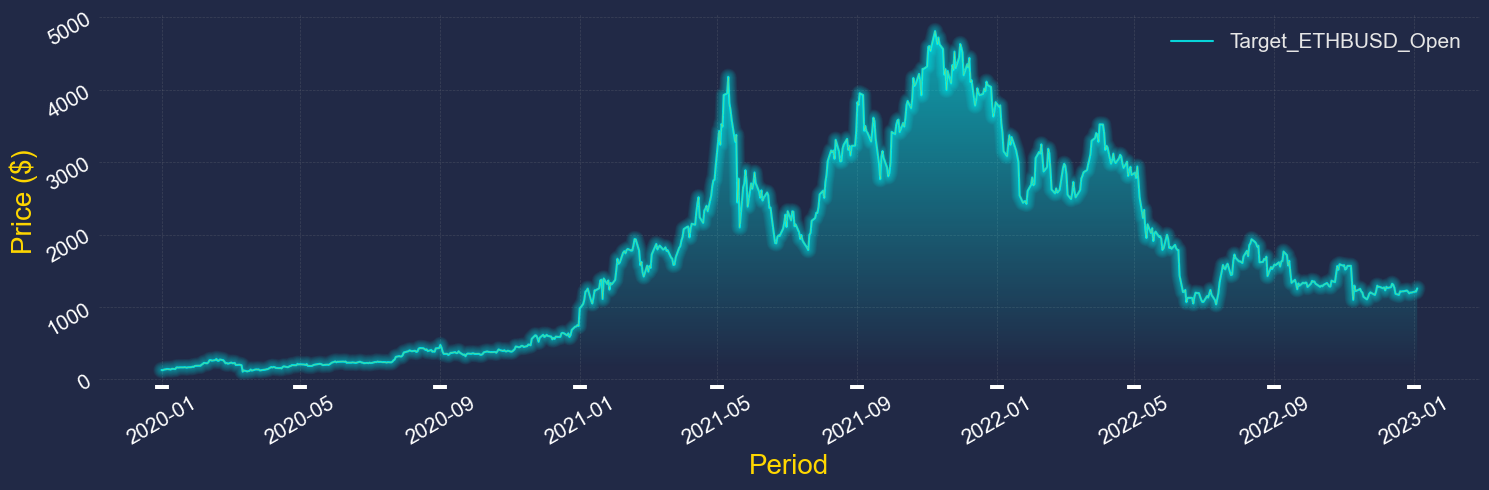

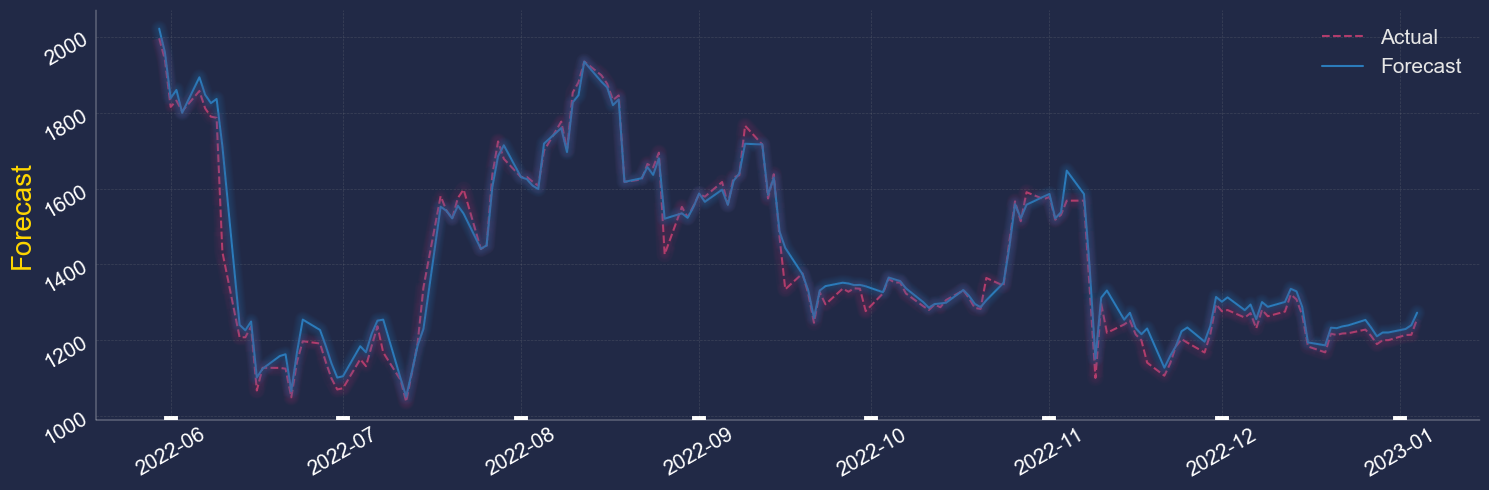

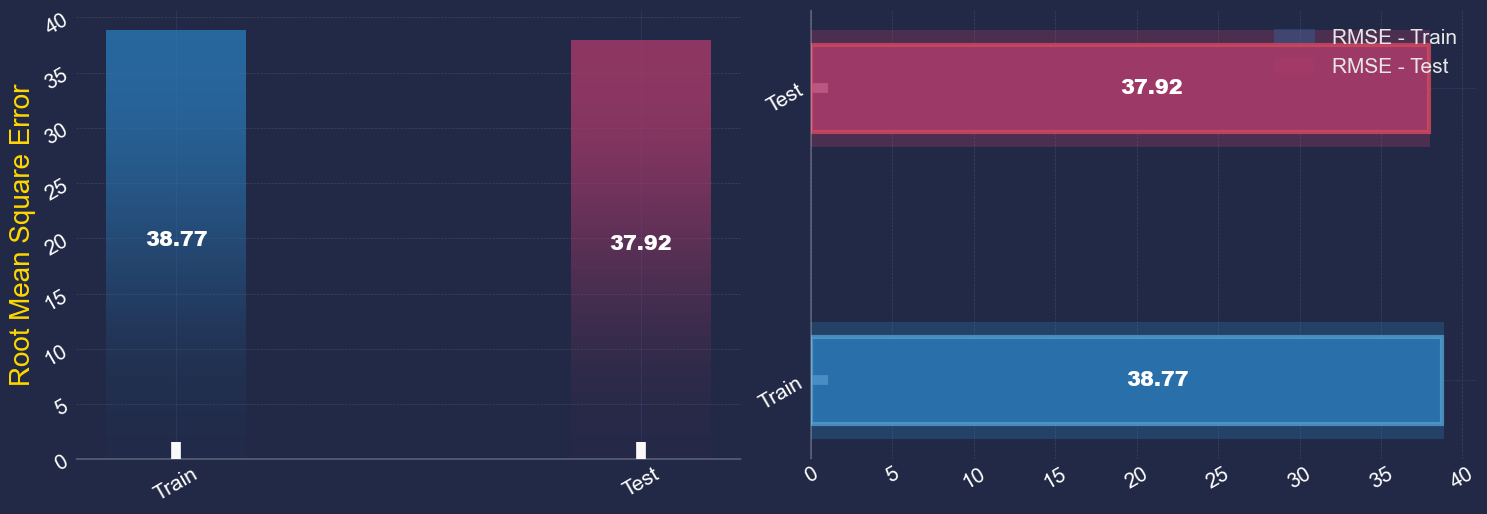

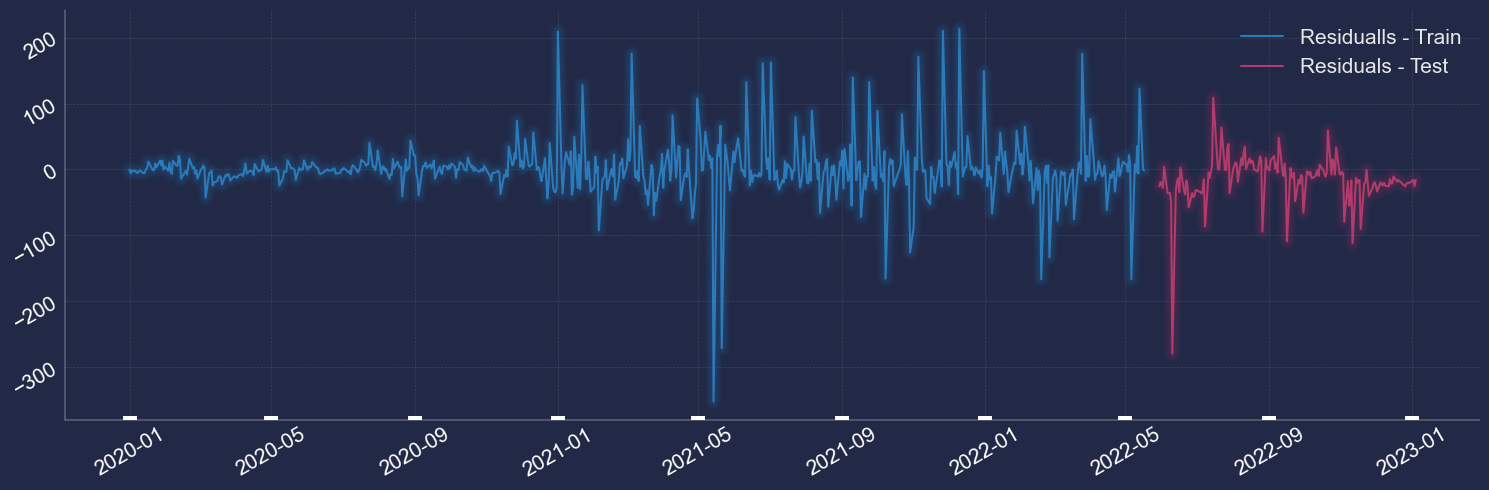

In [36]:
Plots.Plot_Of_Line(dataframe=df1, column_name='Target_ETHBUSD_Open')

lr = LinearRegression()
Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

In [37]:
df2 = Preprocessing.Drop_Holidays_Values(dataframe=df)
df2 = Preprocessing.Select_Target(dataframe=df, column_name='QTUMBUSD_Close')
df2

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()
--- Start Select_Target()
.
Target:  QTUMBUSD_Close 
.
--- End Select_Target()



Target_QTUMBUSD_Close  BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  \
Open time                                                                    
2020-01-01                  1.530       7169.12       7231.86      7151.58   
2020-01-02                  1.624       7177.13       7185.03      6900.00   
2020-01-03                  1.742       6944.41       7393.50      6853.79   
2020-01-06                  1.739       7349.84       7794.98      7343.29   
2020-01-07                  1.683       7757.48       8204.71      7730.00   
...                           ...           ...           ...          ...   
2022-12-29                  1.834      16538.18      16660.00     16482.02   
2022-12-30                  1.907      16626.68      16672.74     16324.53   
2023-01-02                  1.890      16610.69      16793.83     16541.73   
2023-01-03                  1.946      16667.39      16774.13     16597.71   
2023-01-04                  1.935      16669.36      16986.86     16646.27   

            BTCBUSD_Close  BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  \
Open time                                                                
2020-01-01        7176.58     5.984141e+05        128.54        132.51   
2020-01-02        6945.33     1.795818e+06        129.88        129.88   
2020-01-03        7329.20     3.498114e+06        127.02        134.63   
2020-01-06        7755.10     4.159305e+06        135.02        144.23   
2020-01-07        8154.74     7.711175e+06        144.35        145.08   
...                   ...              ...           ...           ...   
2022-12-29       16627.09     7.016834e+08       1189.50       1205.78   
2022-12-30       16600.80     5.066787e+08       1200.01       1201.52   
2023-01-02       16667.55     3.497910e+08       1199.99       1224.00   
2023-01-03       16669.47     5.884571e+08       1213.61       1219.58   
2023-01-04       16845.70     5.620057e+08       1214.15       1272.35   

            ETHBUSD_Low  ETHBUSD_Close  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                               ...                               
2020-01-01       128.43         130.35  ...       202.63         203.65   
2020-01-02       126.01         126.87  ...       192.41         195.44   
2020-01-03       125.70         133.75  ...       192.22         221.76   
2020-01-06       134.89         143.94  ...       222.27         244.11   
2020-01-07       138.97         142.92  ...       232.16         242.95   
...                 ...            ...  ...          ...            ...   
2022-12-29      1186.36        1200.00  ...        97.10          98.40   
2022-12-30      1180.49        1199.43  ...        95.10          96.70   
2023-01-02      1192.73        1213.61  ...        95.40          99.30   
2023-01-03      1204.32        1214.14  ...        98.70          99.70   
2023-01-04      1212.35        1256.34  ...        99.50         101.50   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-06       0.04557       0.05045      0.04556        0.05045   
2020-01-07       0.05064       0.05099      0.04754        0.04827   
...                  ...           ...          ...            ...   
2022-12-29       0.07170       0.07260      0.07030        0.07200   
2022-12-30       0.07200       0.07240      0.07080        0.07240   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2

In [13]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


tuples = list(zip(*arrays))


index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)

s


first  second
bar    one      -1.611571
       two       1.830964
baz    one       1.209216
       two       0.140019
foo    one      -0.121875
       two       0.529364
qux    one       0.712760
       two       0.258253
dtype: float64

In [14]:
s = pd.DataFrame(s)
s

0
first second          
bar   one    -1.611571
      two     1.830964
baz   one     1.209216
      two     0.140019
foo   one    -0.121875
      two     0.529364
qux   one     0.712760
      two     0.258253

In [15]:
s = s.T
s

first        bar                 baz                 foo                qux  \
second       one       two       one       two       one       two      one   
0      -1.611571  1.830964  1.209216  0.140019 -0.121875  0.529364  0.71276   

first             
second       two  
0       0.258253

In [18]:
s[['qux']]


first       qux          
second      one       two
0       0.71276  0.258253

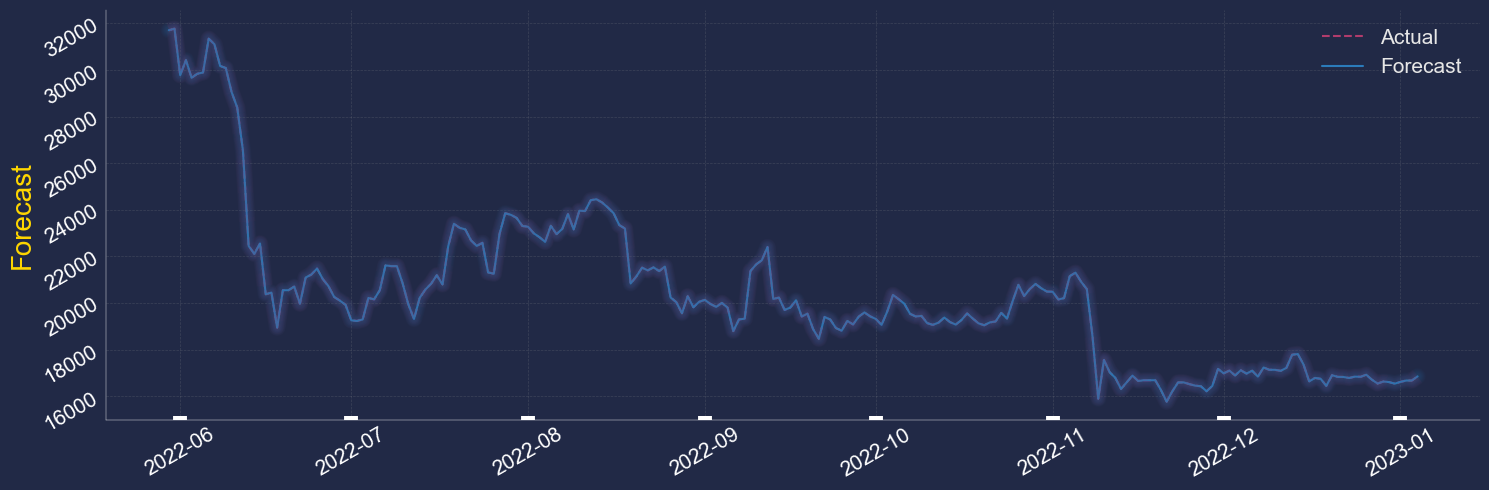

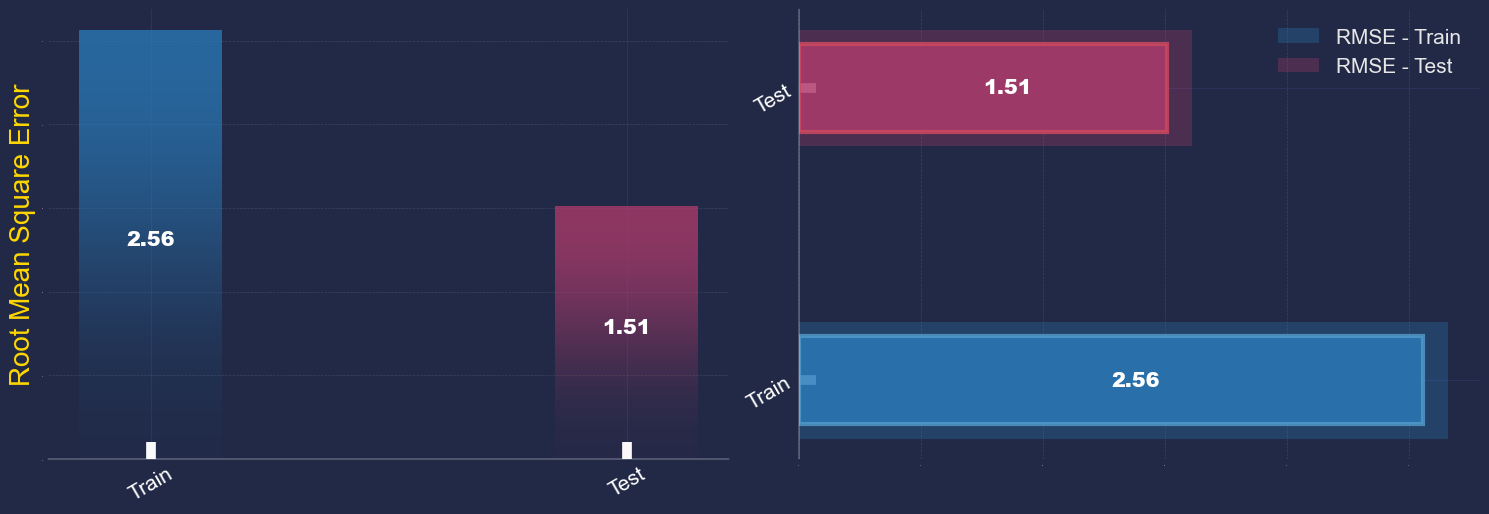

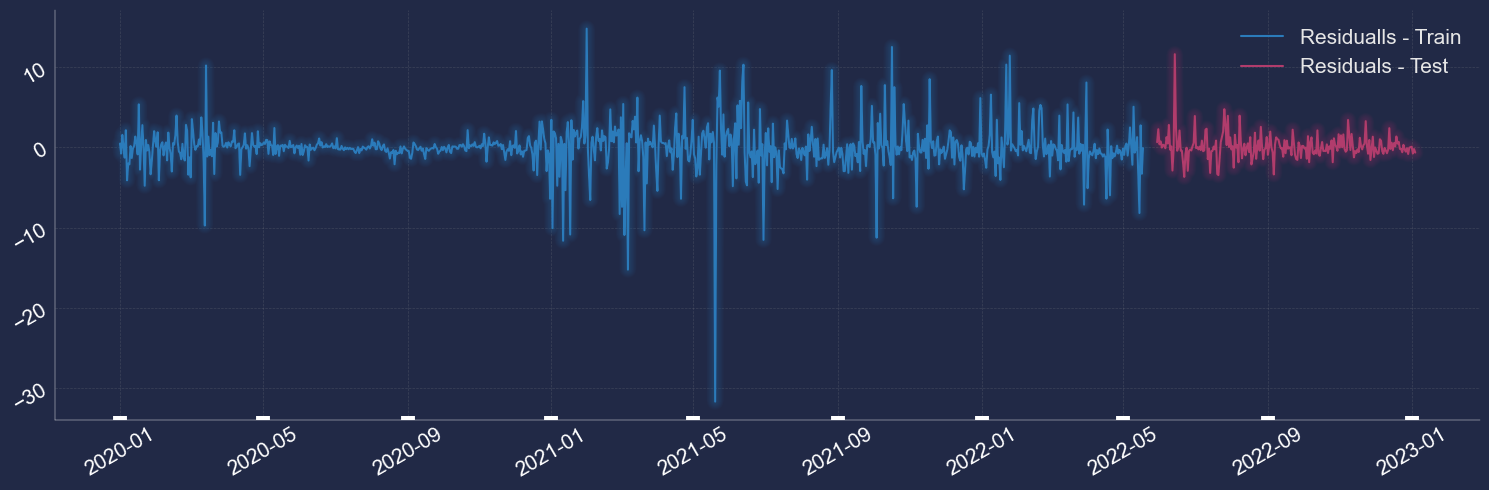

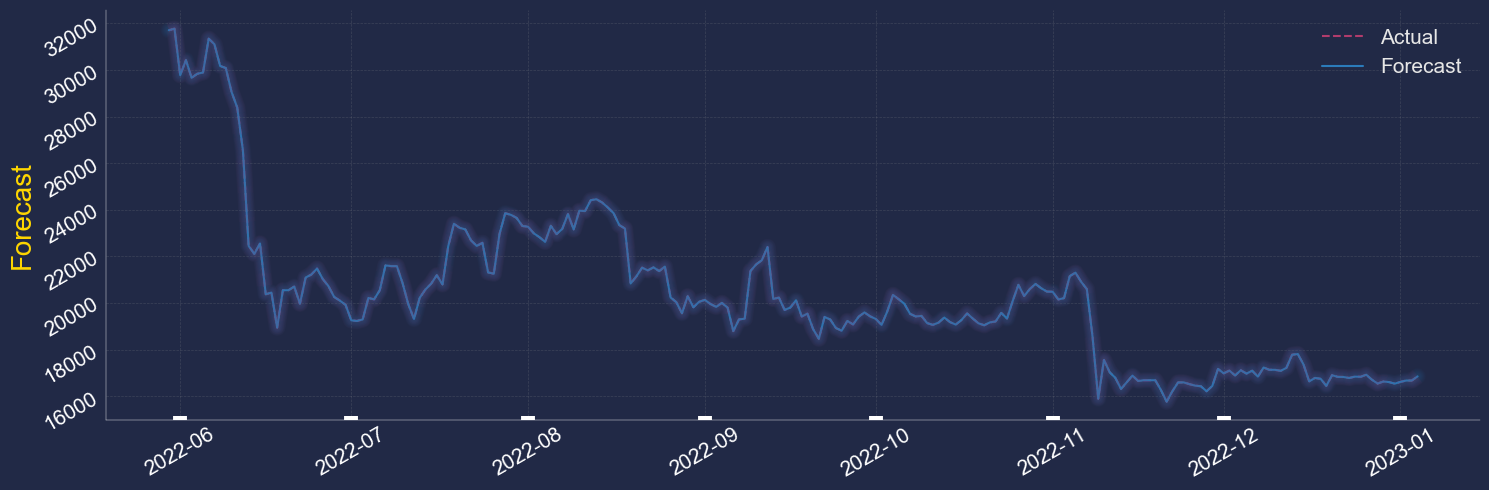

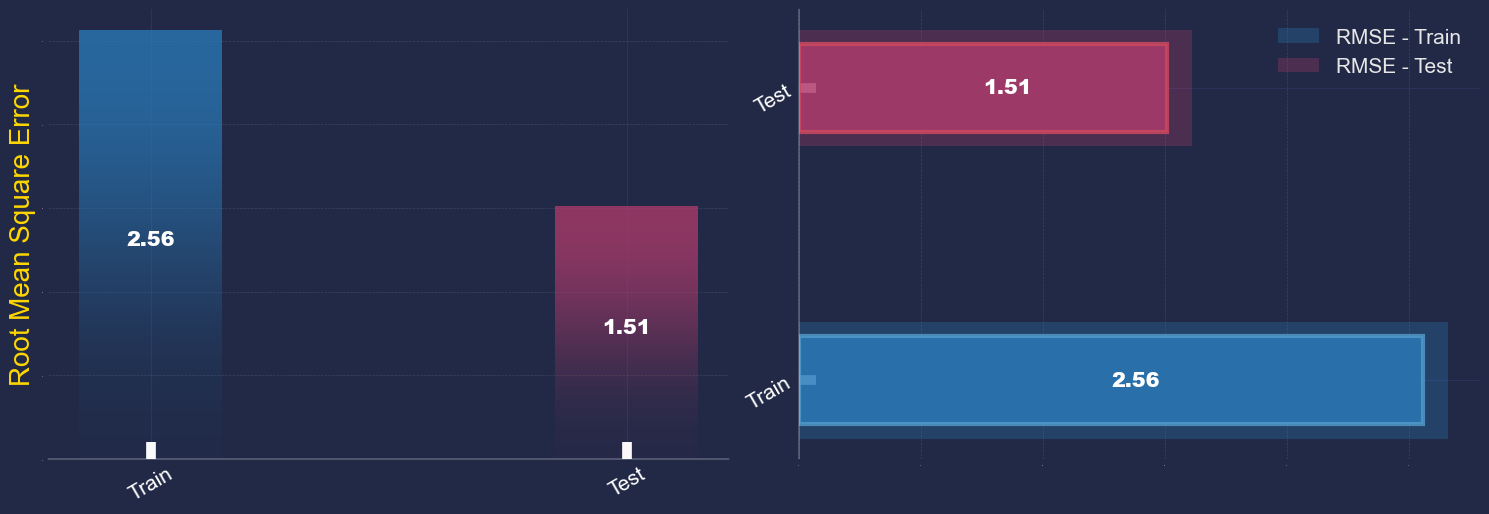

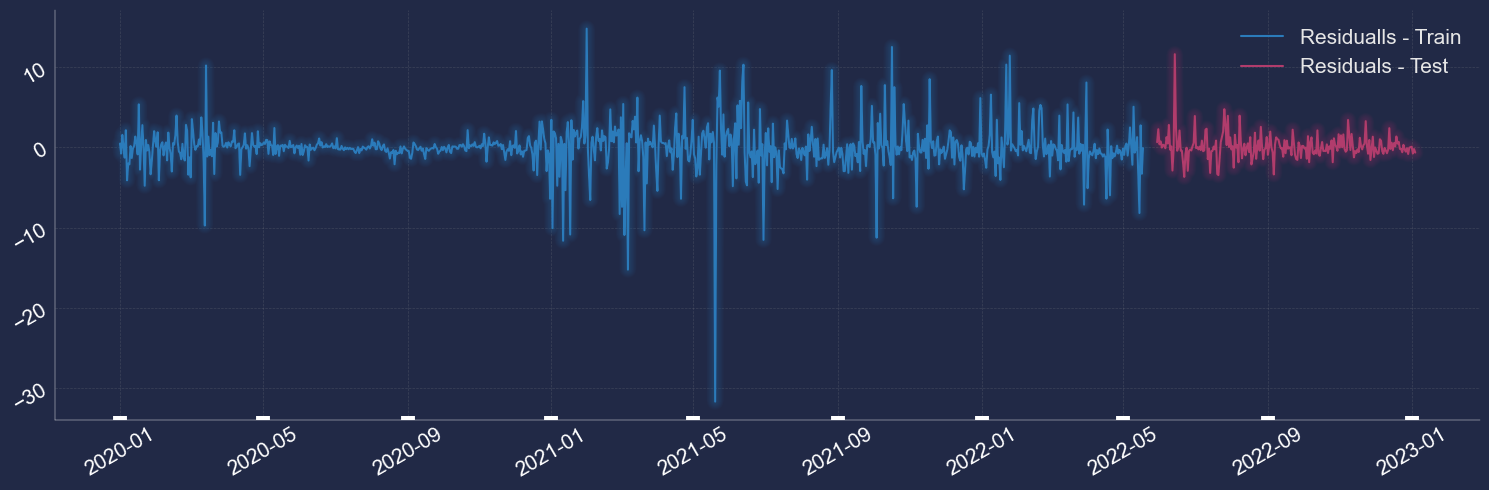

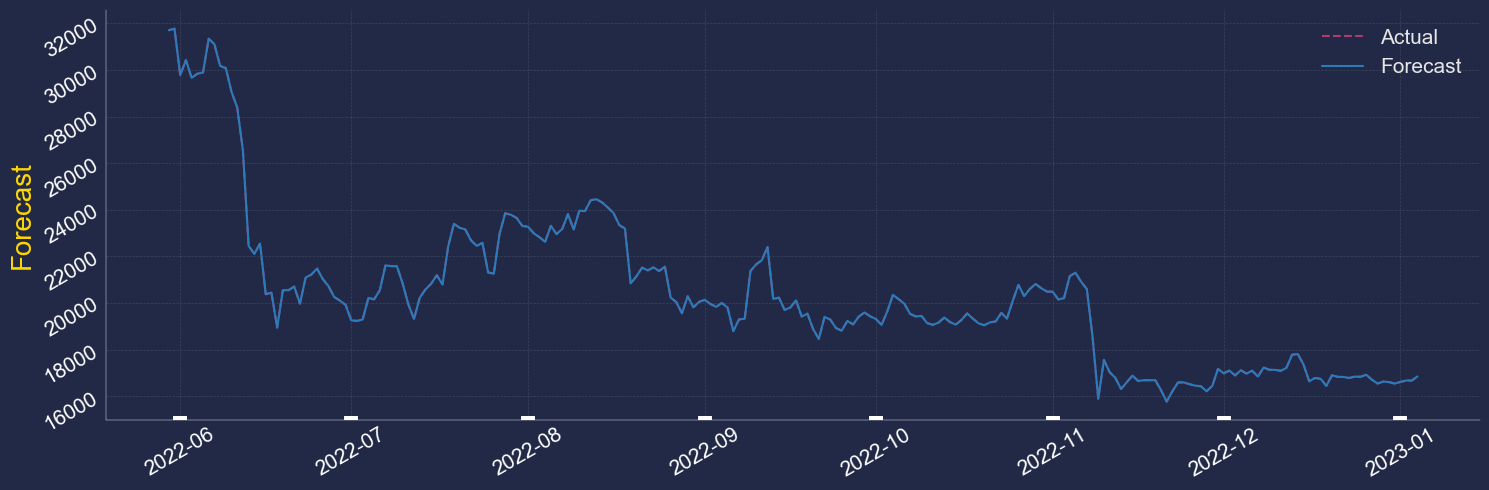

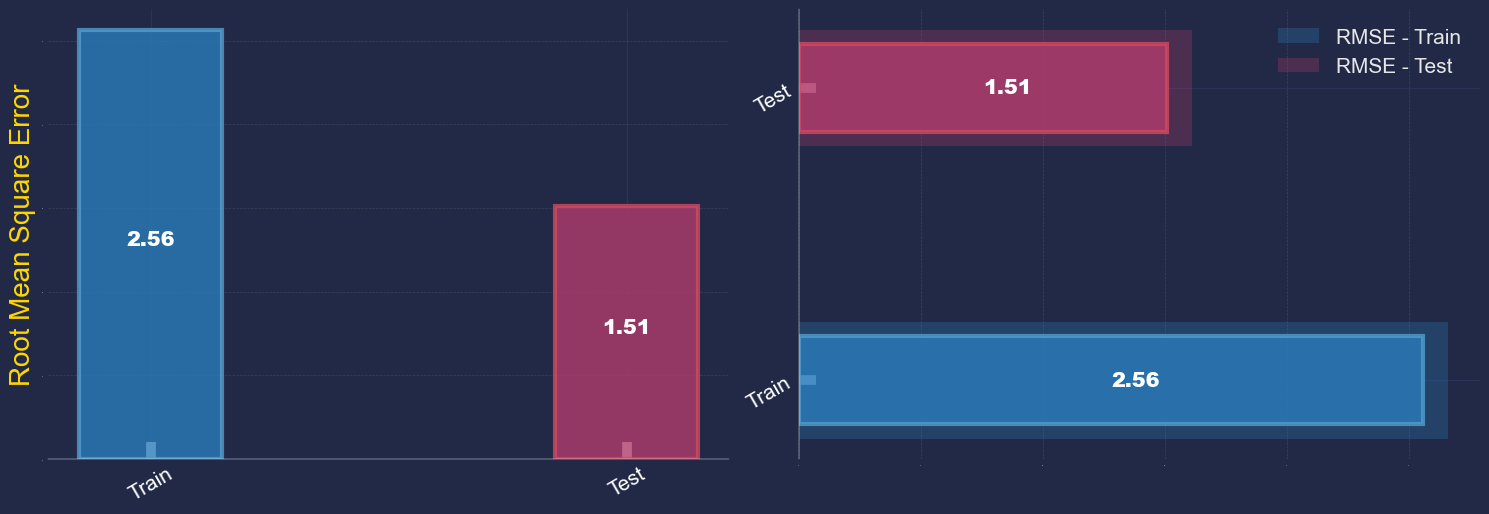

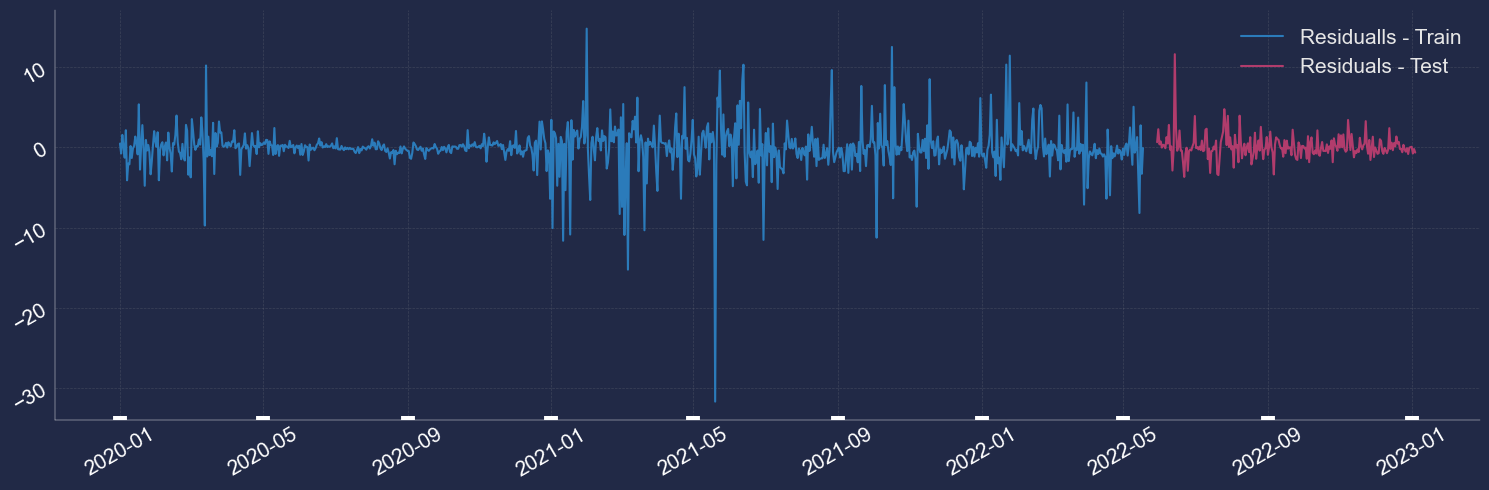

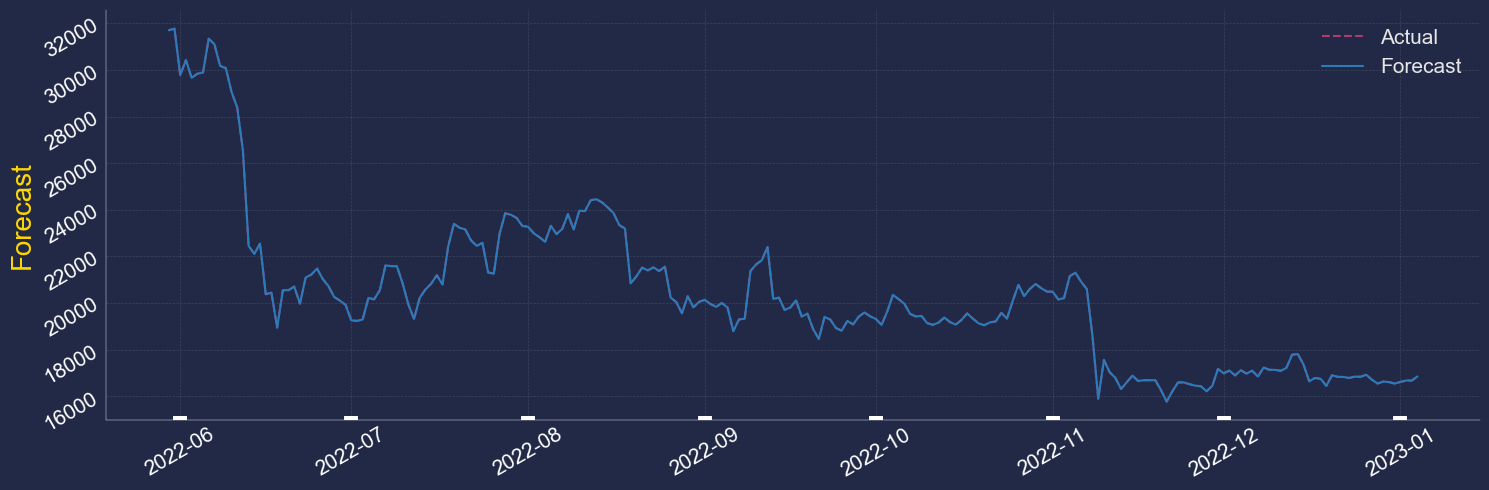

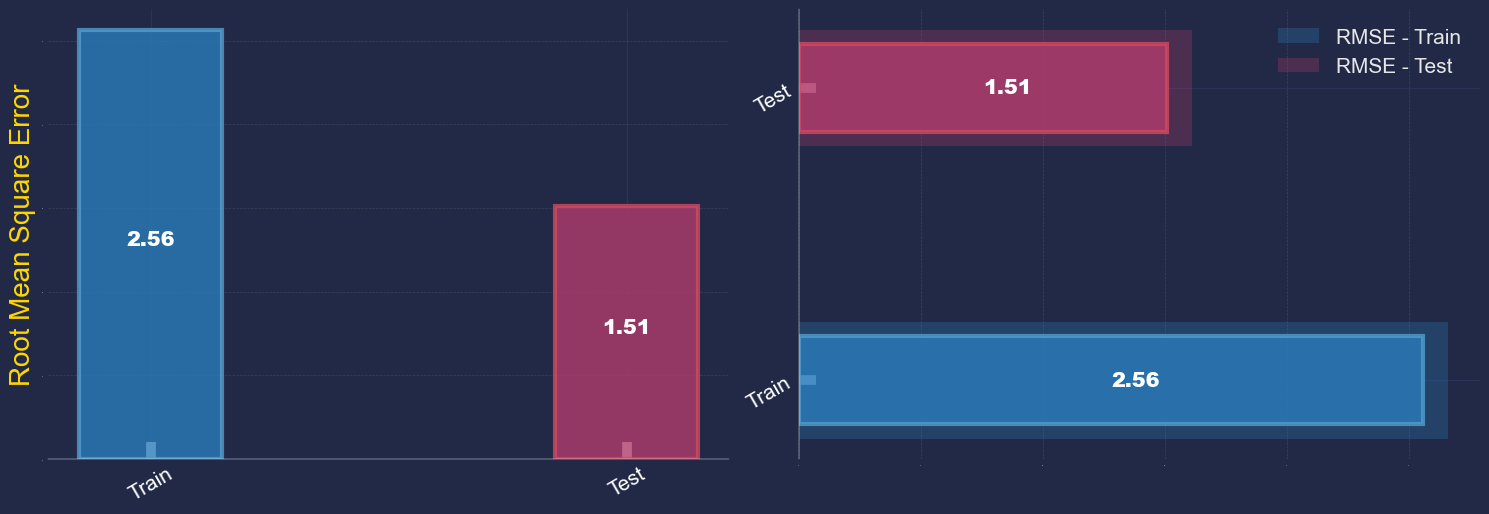

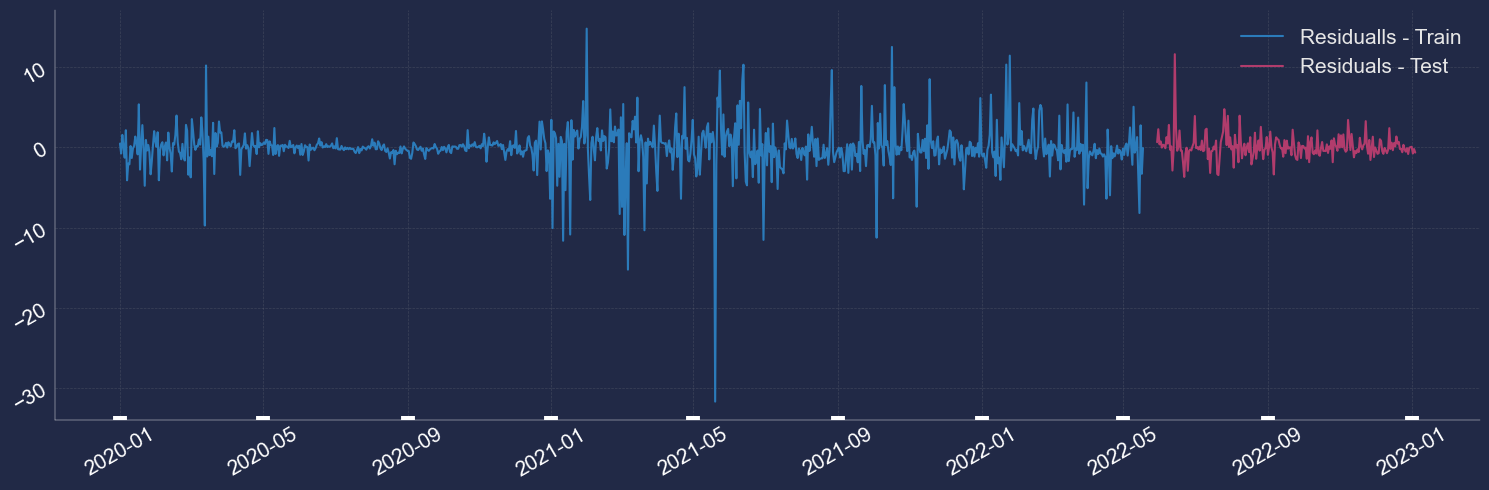

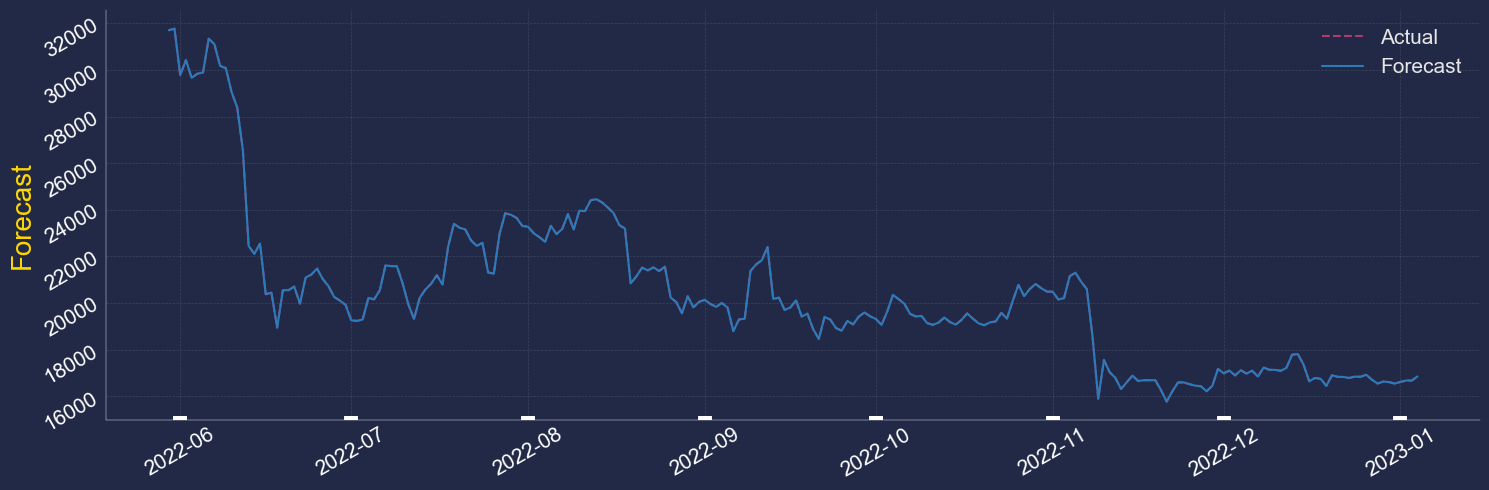

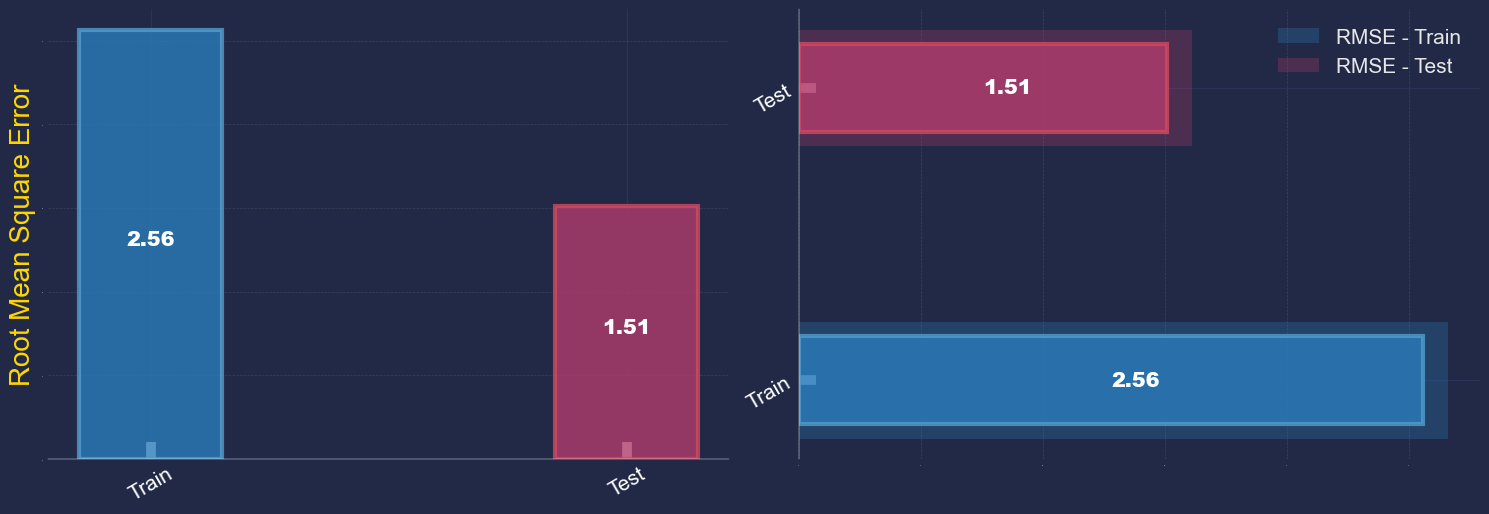

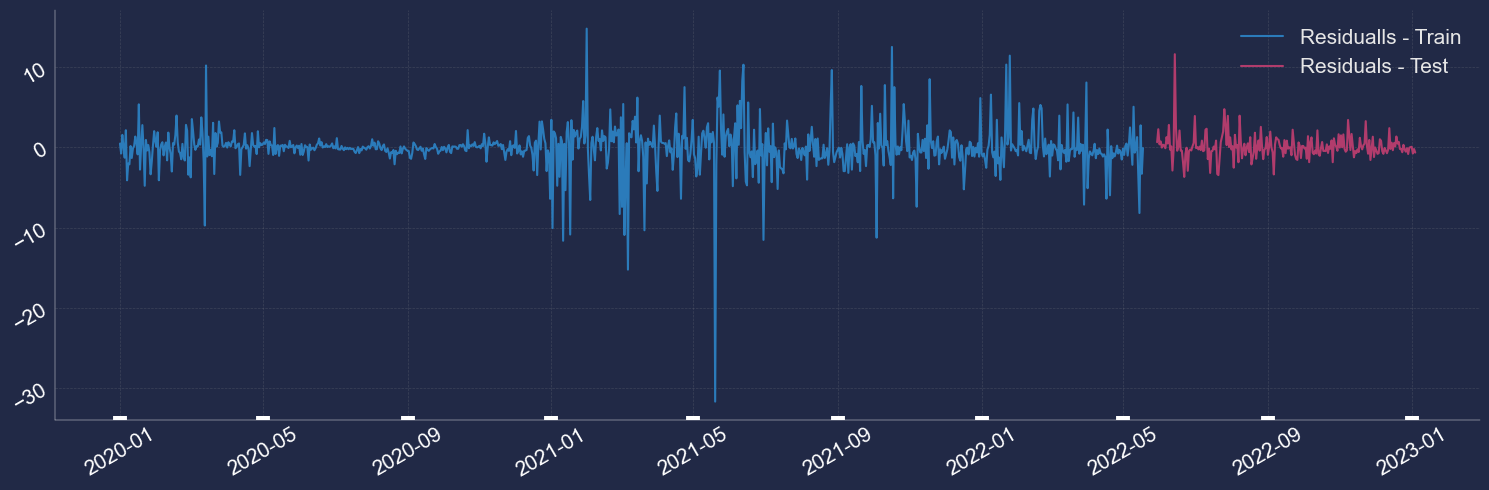

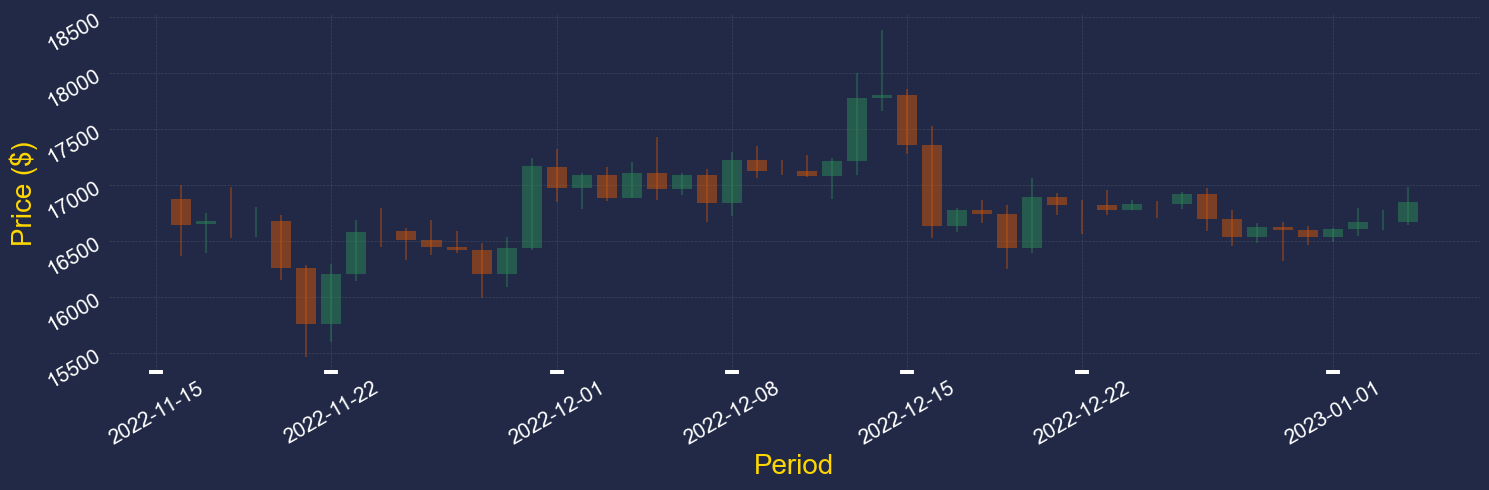

In [20]:
table = df[-50:].copy() 

green_df = table[table.BTCBUSD_Close > table.BTCBUSD_Open].copy()
green_df['Heigth'] = green_df['BTCBUSD_Close'] - green_df['BTCBUSD_Open']

red_df = table[table.BTCBUSD_Close < table.BTCBUSD_Open].copy()
red_df['Heigth'] = red_df['BTCBUSD_Open'] - red_df['BTCBUSD_Close']

pal_green = sns.light_palette("seagreen") #Color
pal_orangered = sns.color_palette("YlOrBr") #Color

plt.style.use("cyberpunk") #Background color

fig = plt.figure(figsize=(15,5), tight_layout=True) #Size of plot dpi=300 for better quality

index = table.index.copy()
index = pd.to_datetime(index)

for i in range(len(table)):
    if table['BTCBUSD_Close'][i] > table['BTCBUSD_Open'][i]:
        plt.vlines(x=index[i], ymin=table['BTCBUSD_Low'][i], ymax=table['BTCBUSD_High'][i], alpha=0.4, colors=pal_green[5])
    elif table['BTCBUSD_Close'][i] < table['BTCBUSD_Open'][i]:
        plt.vlines(x=index[i], ymin=table['BTCBUSD_Low'][i], ymax=table['BTCBUSD_High'][i], alpha=0.4, colors=pal_orangered[4])
    else:
        plt.vlines(x=index[i], ymin=table['BTCBUSD_Low'][i], ymax=table['BTCBUSD_High'][i], alpha=0.4, colors='White')
            

plt.bar(x=green_df.index, height=green_df['Heigth'], bottom=green_df['BTCBUSD_Open'], alpha=0.5, color=pal_green[5]) #color=pal_green[5] , linewidth=2 , fill=False
plt.bar(x=red_df.index, height=red_df['Heigth'], bottom=red_df['BTCBUSD_Close'], alpha=0.5, color=pal_orangered[4]) #color=pal_orangered[4] , linewidth=2 , fill=False

plt.tick_params(axis='x', labelrotation=30, labelsize=15, width=10, length=3, direction="in", colors='White') #Rotation label x and y
plt.tick_params(axis='y', labelrotation=30, labelsize=15, colors='White') #Rotation label x and y
plt.grid(zorder=1, alpha=0.2, linestyle='--', linewidth=0.5, color='darkgrey') #Grid of plot
plt.xlabel('Period', fontsize=20, color='Gold') #Left title
plt.ylabel('Price ($)', fontsize=20, color='Gold') #Bottom title
#plt.yticks(range(15500,20000,500), ["{} $".format(v) for v in range(15500,20000,500)])

plt.show()

In [12]:
df

Target_BTCBUSD_Open  BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  \
Open time                                                                  
2020-01-01              7177.13       7169.12       7231.86      7151.58   
2020-01-02              6944.41       7177.13       7185.03      6900.00   
2020-01-03              7330.91       6944.41       7393.50      6853.79   
2020-01-04              7346.20       7330.91       7388.00      7263.55   
2020-01-05              7349.84       7346.20       7486.66      7315.00   
...                         ...           ...           ...          ...   
2022-12-31             16534.83      16600.77      16637.66     16462.51   
2023-01-01             16610.69      16534.83      16619.00     16490.74   
2023-01-02             16667.39      16610.69      16793.83     16541.73   
2023-01-03             16669.36      16667.39      16774.13     16597.71   
2023-01-04             16845.42      16669.36      16986.86     16646.27   

            BTCBUSD_Close  BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  \
Open time                                                                
2020-01-01        7176.58     5.984141e+05        128.54        132.51   
2020-01-02        6945.33     1.795818e+06        129.88        129.88   
2020-01-03        7329.20     3.498114e+06        127.02        134.63   
2020-01-04        7346.20     2.473634e+06        134.20        135.52   
2020-01-05        7351.42     2.647992e+06        134.26        137.99   
...                   ...              ...           ...           ...   
2022-12-31       16534.86     2.546708e+08       1199.43       1207.84   
2023-01-01       16610.68     2.362445e+08       1195.67       1204.00   
2023-01-02       16667.55     3.497910e+08       1199.99       1224.00   
2023-01-03       16669.47     5.884571e+08       1213.61       1219.58   
2023-01-04       16845.70     5.620057e+08       1214.15       1272.35   

            ETHBUSD_Low  ETHBUSD_Close  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                               ...                               
2020-01-01       128.43         130.35  ...       202.63         203.65   
2020-01-02       126.01         126.87  ...       192.41         195.44   
2020-01-03       125.70         133.75  ...       192.22         221.76   
2020-01-04       132.38         134.17  ...       219.37         224.18   
2020-01-05       134.26         134.99  ...       221.05         222.62   
...                 ...            ...  ...          ...            ...   
2022-12-31      1191.08        1195.67  ...        96.50          97.10   
2023-01-01      1190.22        1199.99  ...        96.10          96.70   
2023-01-02      1192.73        1213.61  ...        95.40          99.30   
2023-01-03      1204.32        1214.14  ...        98.70          99.70   
2023-01-04      1212.35        1256.34  ...        99.50         101.50   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-04       0.04529       0.04572      0.04510        0.04550   
2020-01-05       0.04549       0.04605      0.04525        0.04525   
...                  ...           ...          ...            ...   
2022-12-31       0.07240       0.07240      0.07080        0.07110   
2023-01-01       0.07100       0.07270      0.07060        0.07250   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604  

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1)])

model.compile(optimizer='rmsprop', loss='mse')

In [50]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          epochs=300)

Epoch 1/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56651380.0000 - val_loss: 59768184.0000
Epoch 2/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31179722.0000 - val_loss: 78848576.0000
Epoch 3/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37817308.0000 - val_loss: 81255704.0000
Epoch 4/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37360680.0000 - val_loss: 92177632.0000
Epoch 5/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39617316.0000 - val_loss: 90628672.0000
Epoch 6/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37582000.0000 - val_loss: 98988096.0000
Epoch 7/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39110944.0000 - val_loss: 98096576.0000
Epoch 8/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37698088.0000 - val_loss: 104547888.0000
Epoch 9/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38752220.0000 - val_loss: 104978152.0000
Epoch 10/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37736484.0000 - val_loss: 110758632.0000
Epoch 

Epoch 62/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37442536.0000 - val_loss: 266822240.0000
Epoch 63/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37439724.0000 - val_loss: 266737056.0000
Epoch 64/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37430652.0000 - val_loss: 266670736.0000
Epoch 65/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37427220.0000 - val_loss: 266587248.0000
Epoch 66/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37418764.0000 - val_loss: 266519600.0000
Epoch 67/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37414800.0000 - val_loss: 266437680.0000
Epoch 68/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37406808.0000 - val_loss: 266367728.0000
Epoch 69/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37402488.0000 - val_loss: 266287584.0000
Epoch 70/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37394824.0000 - val_loss: 266217552.0000
Epoch 71/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37390156.0000 - val_loss: 26613

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36732104.0000 - val_loss: 257730080.0000
Epoch 183/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36726192.0000 - val_loss: 257654864.0000
Epoch 184/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36720604.0000 - val_loss: 257578304.0000
Epoch 185/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36714624.0000 - val_loss: 257502576.0000
Epoch 186/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36709068.0000 - val_loss: 257426016.0000
Epoch 187/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36703132.0000 - val_loss: 257350496.0000
Epoch 188/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36697536.0000 - val_loss: 257273808.0000
Epoch 189/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36691644.0000 - val_loss: 257197728.0000
Epoch 190/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36686012.0000 - val_loss: 257121168.0000
Epoch 191/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36680220.0000 - val_loss: 257045408

<AxesSubplot:>

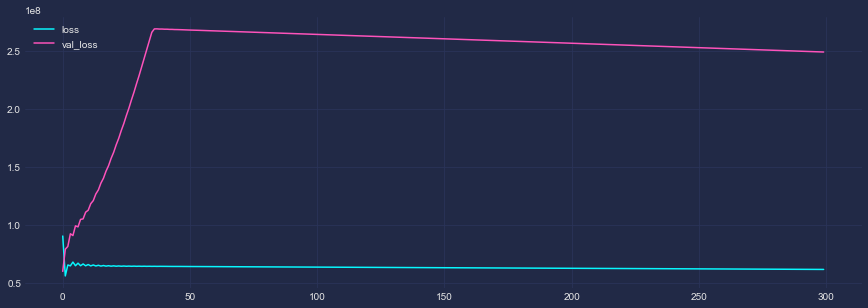

In [51]:
loss_df_mse = pd.DataFrame(model.history.history)

plt.style.use("cyberpunk") #Background color
loss_df_mse.plot(figsize=(15,5))

In [52]:
predict_tr = model.predict(X_train)
dataframe_act_tr = pd.DataFrame(y_train, index=y_train.index)
dataframe_pred_tr = pd.DataFrame(predict_tr, columns=['Predict'], index=y_train.index)

predict = model.predict(X_test)
dataframe_act = pd.DataFrame(y_test, index=y_test.index)
dataframe_pred = pd.DataFrame(predict, columns=['Predict'], index=y_test.index)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


In [53]:
dataframe_act_pred_tr = pd.concat([dataframe_act_tr,dataframe_pred_tr], axis=1)

dataframe_act_pred = pd.concat([dataframe_act,dataframe_pred], axis=1)

<AxesSubplot:xlabel='Open time'>

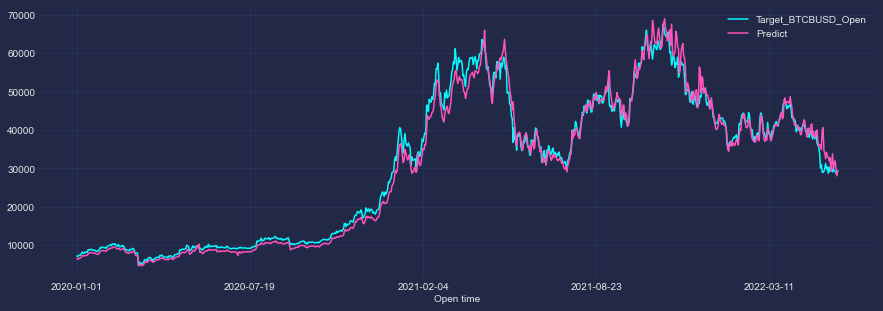

In [54]:
plt.style.use("cyberpunk") #Background color
dataframe_act_pred_tr.plot(figsize=(15,5))

<AxesSubplot:xlabel='Open time'>

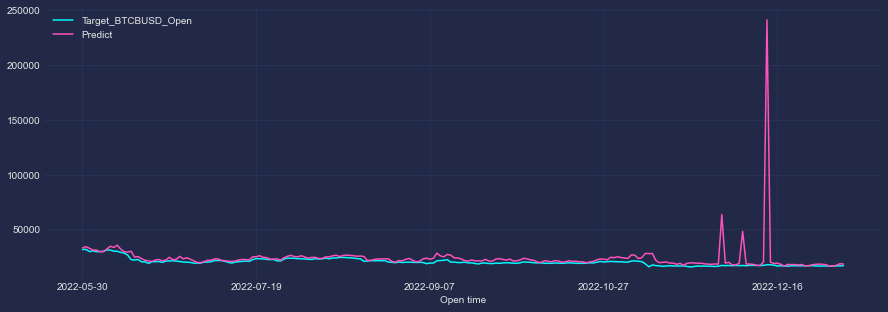

In [55]:
plt.style.use("cyberpunk") #Background color
dataframe_act_pred.plot(figsize=(15,5))

In [ ]:
model.fit()